#House Price Prediction

Import all the necessary libraries before loading the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

In [4]:
df_train.drop("Id", axis=1, inplace=True)

In [5]:
df_test.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   
5  1466          60       RL         75.0    10000   Pave   NaN      IR1   
6  1467          20       RL          NaN     7980   Pave   NaN      IR1   
7  1468          60       RL         63.0     8402   Pave   NaN      IR1   
8  1469          20       RL         85.0    10176   Pave   NaN      Reg   
9  1470          20       RL         70.0     8400   Pave   NaN      Reg   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   
5         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
6         Lvl    AllPub  ...           0        0    NaN  GdPrv        Shed   
7         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
8         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
9         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  
5       0      4    2010        WD         Normal  
6     500      3    2010        WD         Normal  
7       0      5    2010        WD         Normal  
8       0      2    2010        WD         Normal  
9       0      4    2010        WD         Normal  

[10 rows x 80 columns]

In [6]:
df_test.drop("Id", axis=1, inplace=True)

Both datasets have same dimension except Test set have 1 less feature because that's our target feature.

In [7]:
pd.set_option('display.max_columns', None)

Since we have too many features, it wont showup normally by default so getting our columns display to max so that we would easily explore our dataset

<Axes: >

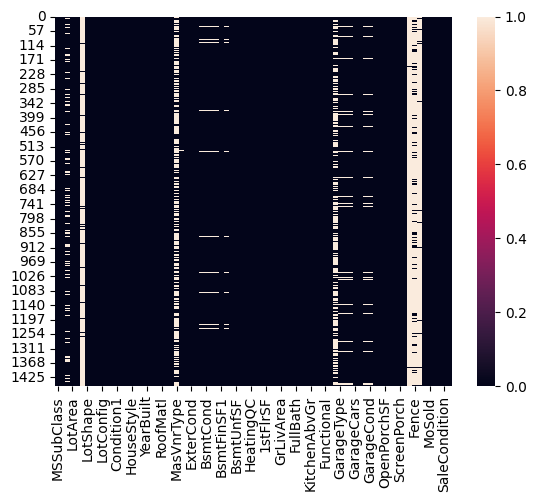

In [8]:
sns.heatmap(df_train.isnull())

In [9]:
for col in df_train.columns:
    if (df_train[col].isnull().sum() / len(df_train)) * 100 > 0:
        print(f"{(df_train[col].isnull().sum() / len(df_train)) * 100:.2f}% missing values in '{col}'")

17.74% missing values in 'LotFrontage'
93.77% missing values in 'Alley'
59.73% missing values in 'MasVnrType'
0.55% missing values in 'MasVnrArea'
2.53% missing values in 'BsmtQual'
2.53% missing values in 'BsmtCond'
2.60% missing values in 'BsmtExposure'
2.53% missing values in 'BsmtFinType1'
2.60% missing values in 'BsmtFinType2'
0.07% missing values in 'Electrical'
47.26% missing values in 'FireplaceQu'
5.55% missing values in 'GarageType'
5.55% missing values in 'GarageYrBlt'
5.55% missing values in 'GarageFinish'
5.55% missing values in 'GarageQual'
5.55% missing values in 'GarageCond'
99.52% missing values in 'PoolQC'
80.75% missing values in 'Fence'
96.30% missing values in 'MiscFeature'


<Axes: >

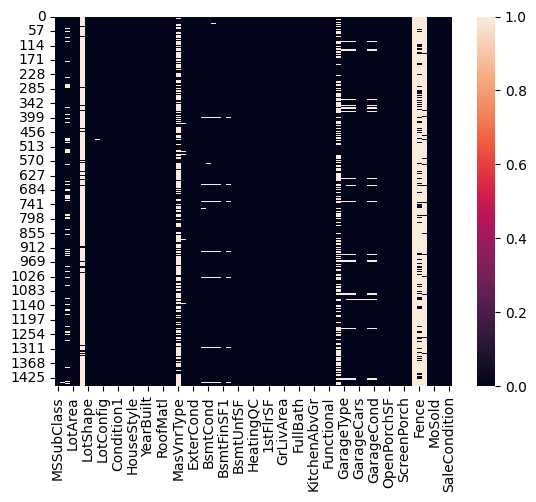

In [10]:
sns.heatmap(df_test.isnull())

In [11]:
for col in df_test.columns:
    if (df_test[col].isnull().sum() / len(df_test)) * 100 > 0:
        print(f"{(df_test[col].isnull().sum() / len(df_test)) * 100:.2f}% missing values in '{col}'")

0.27% missing values in 'MSZoning'
15.56% missing values in 'LotFrontage'
92.67% missing values in 'Alley'
0.14% missing values in 'Utilities'
0.07% missing values in 'Exterior1st'
0.07% missing values in 'Exterior2nd'
61.27% missing values in 'MasVnrType'
1.03% missing values in 'MasVnrArea'
3.02% missing values in 'BsmtQual'
3.08% missing values in 'BsmtCond'
3.02% missing values in 'BsmtExposure'
2.88% missing values in 'BsmtFinType1'
0.07% missing values in 'BsmtFinSF1'
2.88% missing values in 'BsmtFinType2'
0.07% missing values in 'BsmtFinSF2'
0.07% missing values in 'BsmtUnfSF'
0.07% missing values in 'TotalBsmtSF'
0.14% missing values in 'BsmtFullBath'
0.14% missing values in 'BsmtHalfBath'
0.07% missing values in 'KitchenQual'
0.14% missing values in 'Functional'
50.03% missing values in 'FireplaceQu'
5.21% missing values in 'GarageType'
5.35% missing values in 'GarageYrBlt'
5.35% missing values in 'GarageFinish'
0.07% missing values in 'GarageCars'
0.07% missing values in 'Gar

+ Both the training and testing dataset have different number of columns where they have missing values. For the same columns we would need to have closer look at attributes within a feature, for the different one we can easily fix dataset without checking for both the datasets

<Axes: ylabel='count'>

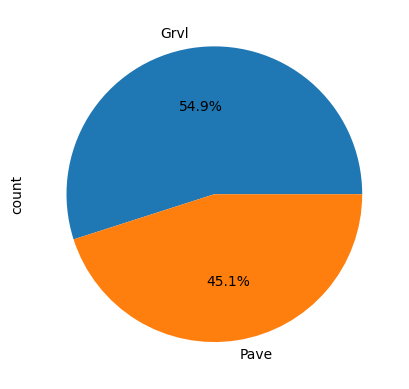

In [12]:
df_train['Alley'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: ylabel='count'>

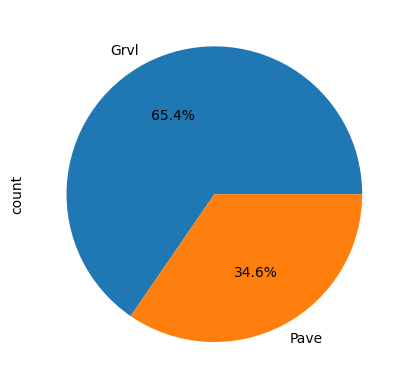

In [13]:
df_test['Alley'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [14]:
df_train['Alley'].groupby(df_train['Alley']).value_counts()

Alley  Alley
Grvl   Grvl     50
Pave   Pave     41
Name: count, dtype: int64

In [15]:
df_train['Alley'].isnull().sum()

1369

Alley in house price prediction refers to the type of access to an alley or service road behind the property. This feature can influence the property's value.
Common types would be
+ Grvl: Gravel alley
+ Pave: Paved alley
+ NA: No alley access

Since most of the house won't have Alley so we can either delete this feature or modify it with "No Alley" attribute. Since we can't verify if house have missing Alley info or it doesn't have one, we would drop this feature from both train and test dataset for reducing any noise it could create.

In [16]:
df_train.drop('Alley', axis=1, inplace=True)

In [17]:
df_test.drop('Alley', axis=1, inplace=True)

<Axes: ylabel='count'>

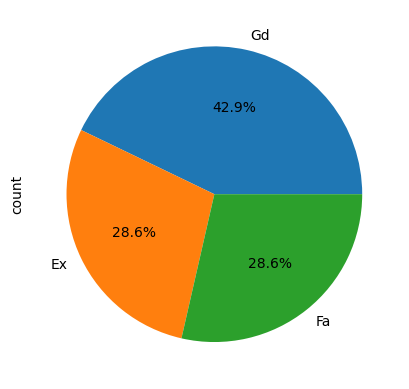

In [18]:
df_train['PoolQC'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [19]:
df_train['PoolQC'].value_counts()

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

<Axes: ylabel='count'>

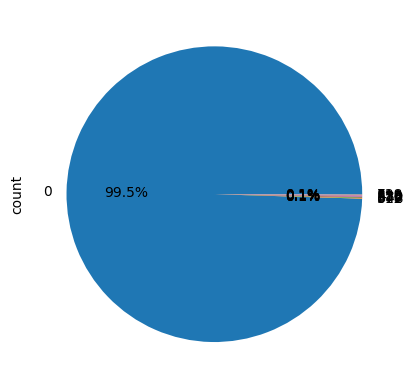

In [20]:
df_train['PoolArea'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [21]:
df_train['PoolArea'].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [22]:
df_test["PoolQC"].value_counts()

PoolQC
Ex    2
Gd    1
Name: count, dtype: int64

In [23]:
df_test["PoolArea"].value_counts()

PoolArea
0      1453
144       1
368       1
444       1
228       1
561       1
800       1
Name: count, dtype: int64

Both train and test datasets dont have info about Pool so we would drop both PoolQC and PoolArea

In [24]:
df_train.drop(['PoolQC',"PoolArea"], axis=1, inplace=True)

In [25]:
df_test.drop(['PoolQC',"PoolArea"], axis=1, inplace=True)

<Axes: ylabel='count'>

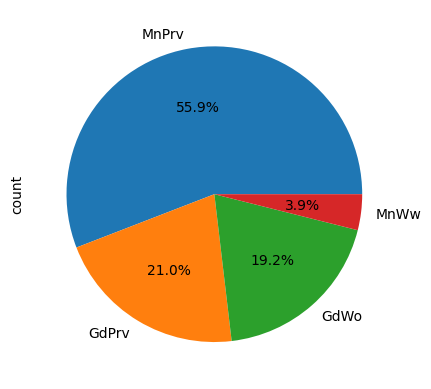

In [26]:
df_train['Fence'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [27]:
df_train['Fence'].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [28]:
df_train['Fence'].isnull().sum()

1179

In [29]:
df_test['Fence'].value_counts()

Fence
MnPrv    172
GdPrv     59
GdWo      58
MnWw       1
Name: count, dtype: int64

In [30]:
df_test['Fence'].isnull().sum()

1169

Most of the house don't have Fence so we would drop it as well

In [31]:
df_train.drop('Fence',axis=1,inplace=True)

In [32]:
df_test.drop('Fence',axis=1,inplace=True)

<Axes: ylabel='count'>

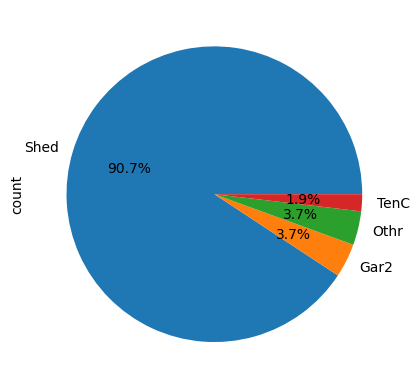

In [33]:
df_train['MiscFeature'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [34]:
df_train['MiscFeature'].isnull().sum()

1406

In [35]:
df_train['MiscVal'].value_counts()

MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64

Some of the miscellaneous features can make the huge difference in price but still 90%+ missing data can cause noise so we could drop this as well

In [36]:
df_train.drop(["MiscFeature","MiscVal"], axis=1, inplace=True)

In [37]:
df_test.drop(["MiscFeature","MiscVal"], axis=1, inplace=True)

<Axes: ylabel='count'>

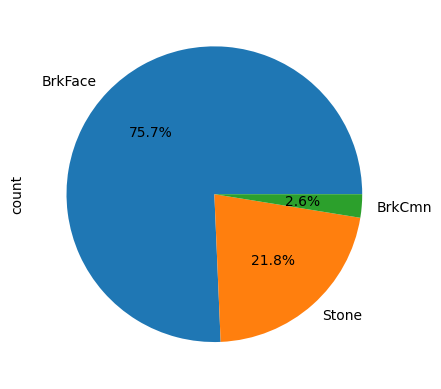

In [38]:
df_train['MasVnrType'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [39]:
df_train['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [40]:
df_train['MasVnrType'].isnull().sum()

872

Almost 60% data is missing in both the datasets and imputation could add noise, since missing values are huge and column is categorical we would just drop it from both the datasets

In [41]:
df_train.drop(["MasVnrType", "MasVnrArea"],axis=1, inplace=True)

In [42]:
df_test.drop(["MasVnrType", "MasVnrArea"],axis=1, inplace=True)

<Axes: ylabel='count'>

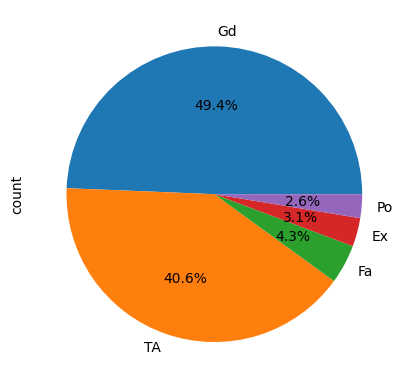

In [43]:
df_train['FireplaceQu'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [44]:
df_train['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [45]:
df_train['FireplaceQu'].isnull().sum()

690

In [46]:
df_train['Fireplaces'].isnull().sum()

0

In [47]:
df_train['Fireplaces'].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

In [48]:
df_test['FireplaceQu'].isnull().sum()

730

In [49]:
df_test['Fireplaces'].value_counts()

Fireplaces
0    730
1    618
2    104
3      6
4      1
Name: count, dtype: int64

Fireplace quality is missing only in those attributes that doesn't have fireplace but since its giving us null values we would do imputation to fix it.

In [50]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('No Fireplace')

In [51]:
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('No Fireplace')

In [52]:
for col in df_train.columns:
    if (df_train[col].isnull().sum() / len(df_train)) * 100 > 0:
        print(f"{(df_train[col].isnull().sum() / len(df_train)) * 100:.2f}% missing values in '{col}' -- Data type: {df_train[col].dtype}")

17.74% missing values in 'LotFrontage' -- Data type: float64
2.53% missing values in 'BsmtQual' -- Data type: object
2.53% missing values in 'BsmtCond' -- Data type: object
2.60% missing values in 'BsmtExposure' -- Data type: object
2.53% missing values in 'BsmtFinType1' -- Data type: object
2.60% missing values in 'BsmtFinType2' -- Data type: object
0.07% missing values in 'Electrical' -- Data type: object
5.55% missing values in 'GarageType' -- Data type: object
5.55% missing values in 'GarageYrBlt' -- Data type: float64
5.55% missing values in 'GarageFinish' -- Data type: object
5.55% missing values in 'GarageQual' -- Data type: object
5.55% missing values in 'GarageCond' -- Data type: object


In [53]:
for col in df_test.columns:
    if (df_test[col].isnull().sum() / len(df_test)) * 100 > 0:
        print(f"{(df_test[col].isnull().sum() / len(df_test)) * 100:.2f}% missing values in '{col}' -- Data type: {df_test[col].dtype}")

0.27% missing values in 'MSZoning' -- Data type: object
15.56% missing values in 'LotFrontage' -- Data type: float64
0.14% missing values in 'Utilities' -- Data type: object
0.07% missing values in 'Exterior1st' -- Data type: object
0.07% missing values in 'Exterior2nd' -- Data type: object
3.02% missing values in 'BsmtQual' -- Data type: object
3.08% missing values in 'BsmtCond' -- Data type: object
3.02% missing values in 'BsmtExposure' -- Data type: object
2.88% missing values in 'BsmtFinType1' -- Data type: object
0.07% missing values in 'BsmtFinSF1' -- Data type: float64
2.88% missing values in 'BsmtFinType2' -- Data type: object
0.07% missing values in 'BsmtFinSF2' -- Data type: float64
0.07% missing values in 'BsmtUnfSF' -- Data type: float64
0.07% missing values in 'TotalBsmtSF' -- Data type: float64
0.14% missing values in 'BsmtFullBath' -- Data type: float64
0.14% missing values in 'BsmtHalfBath' -- Data type: float64
0.07% missing values in 'KitchenQual' -- Data type: object

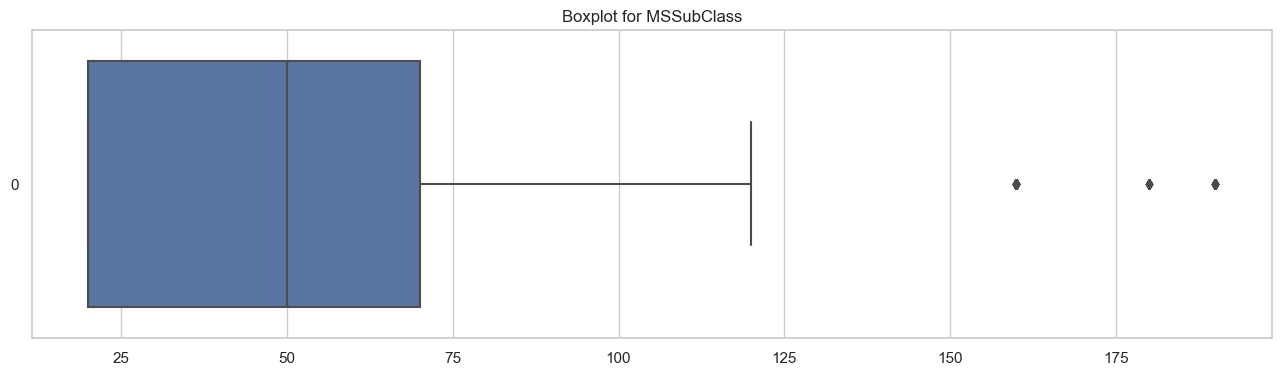

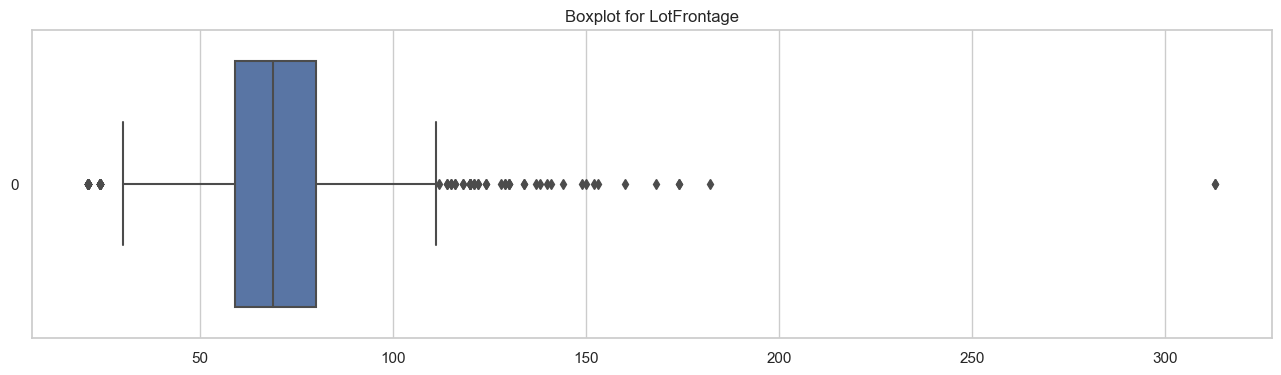

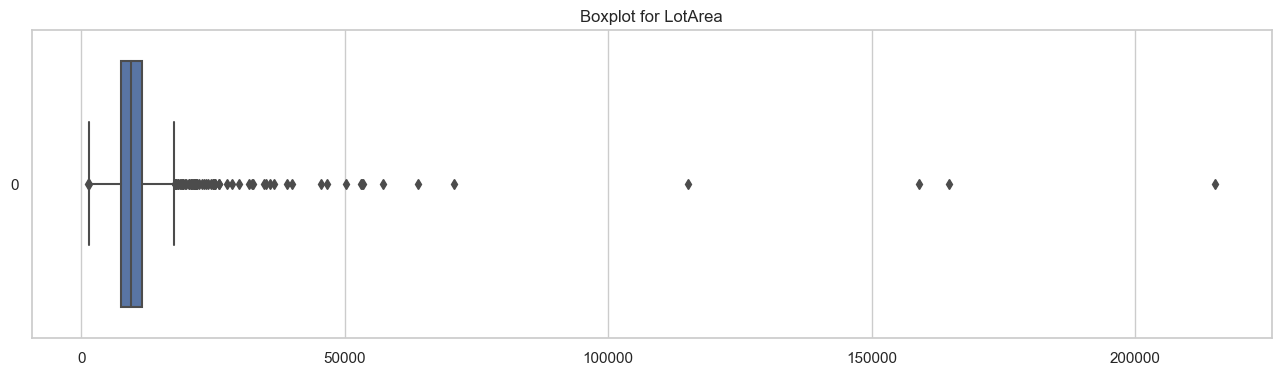

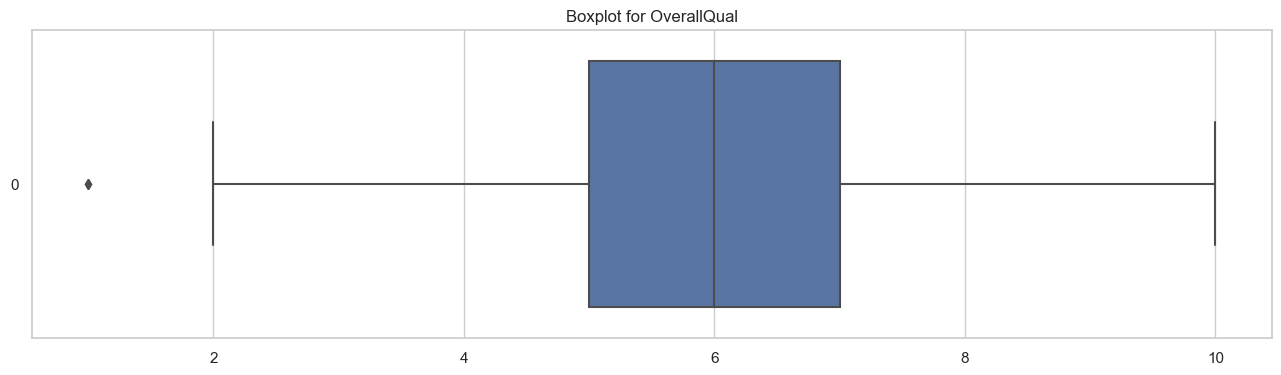

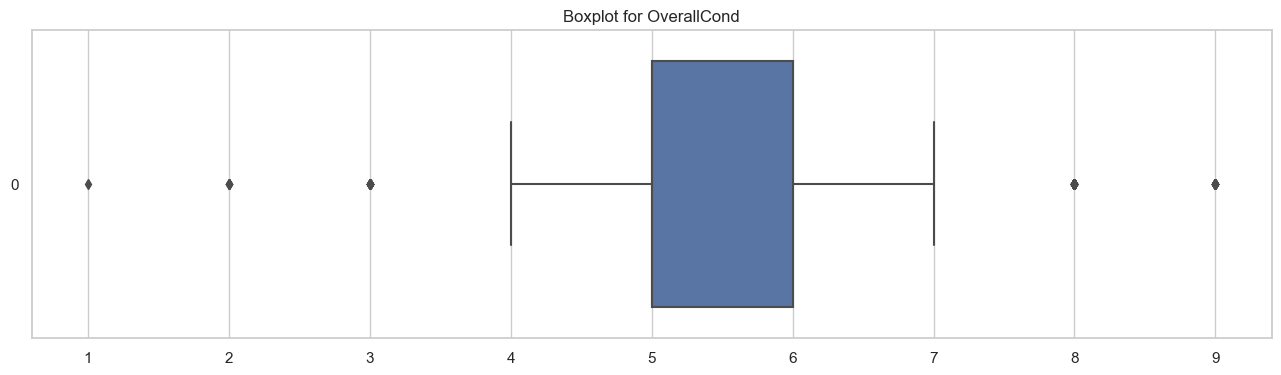

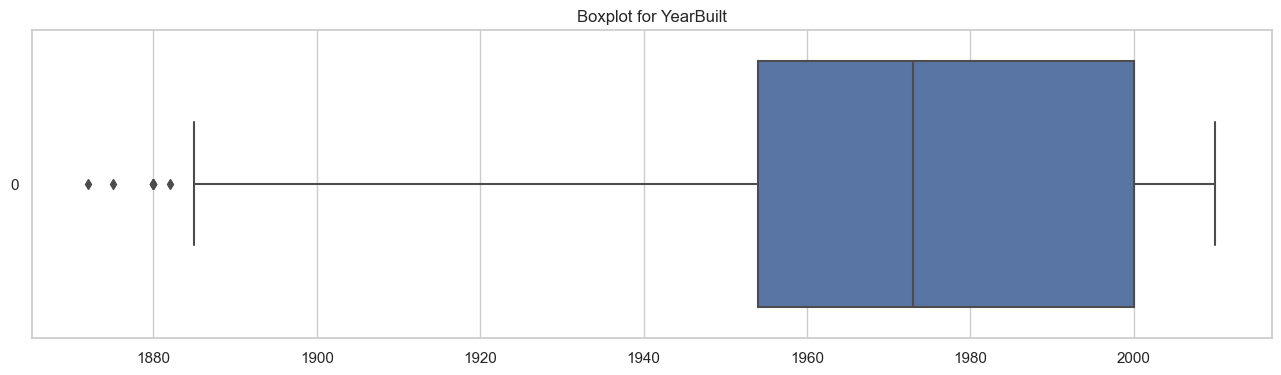

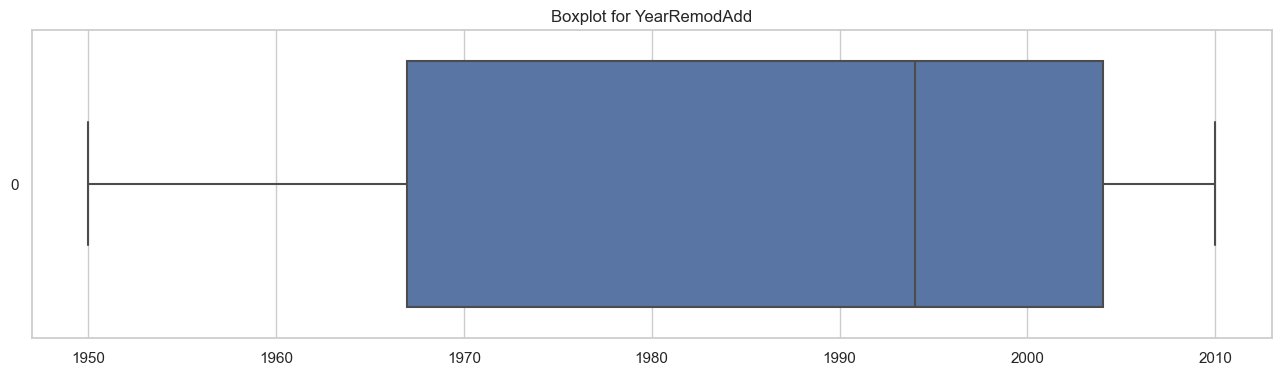

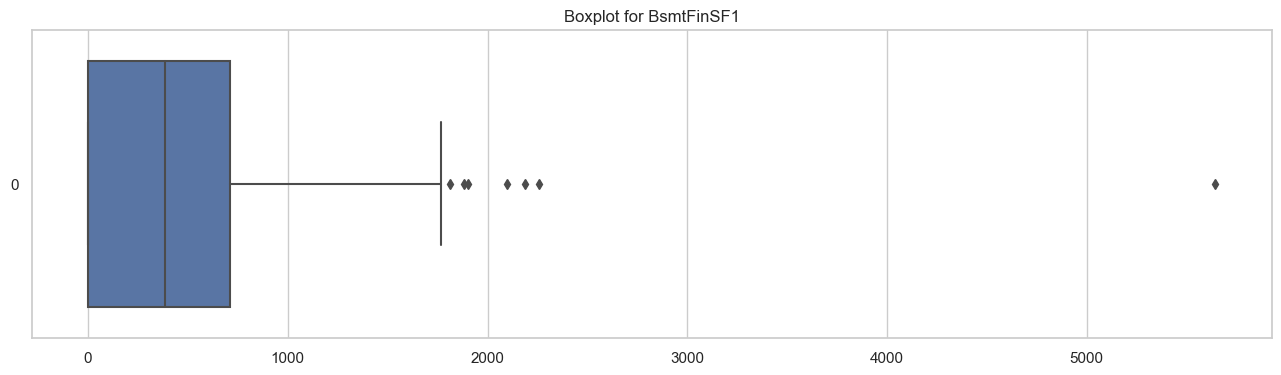

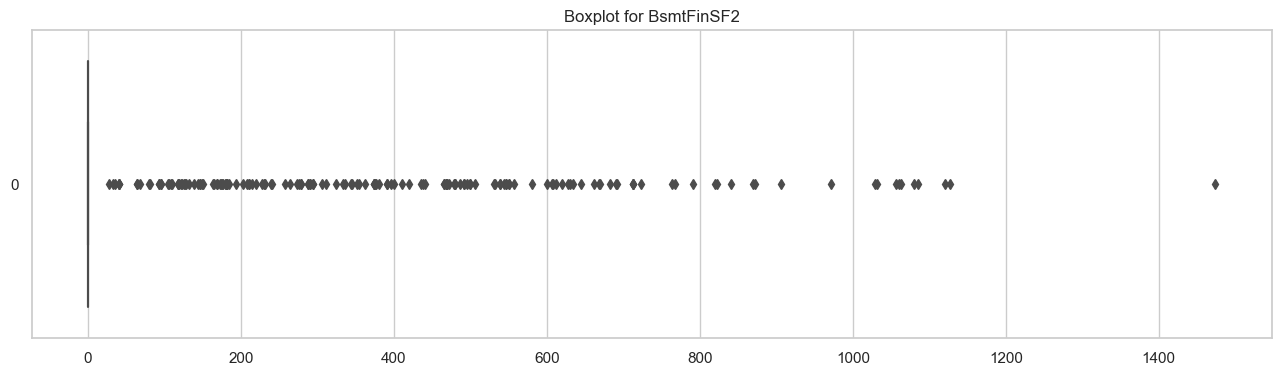

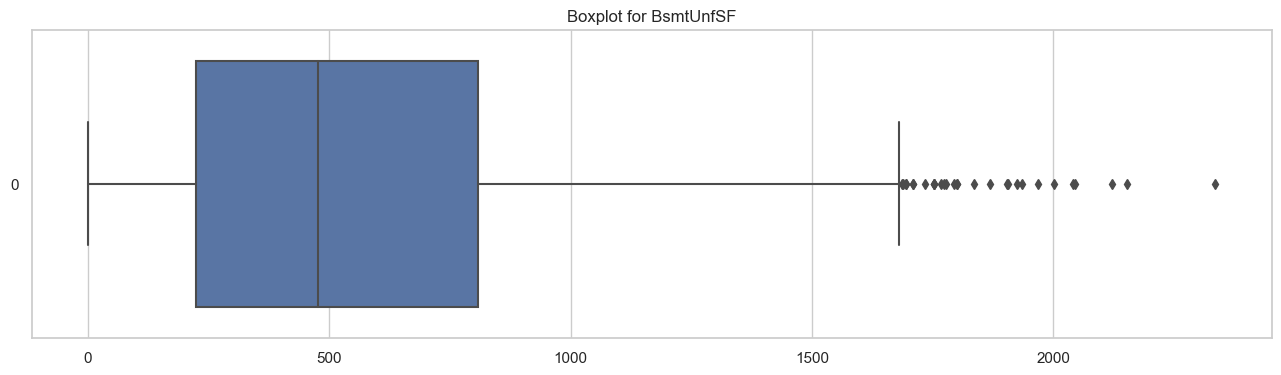

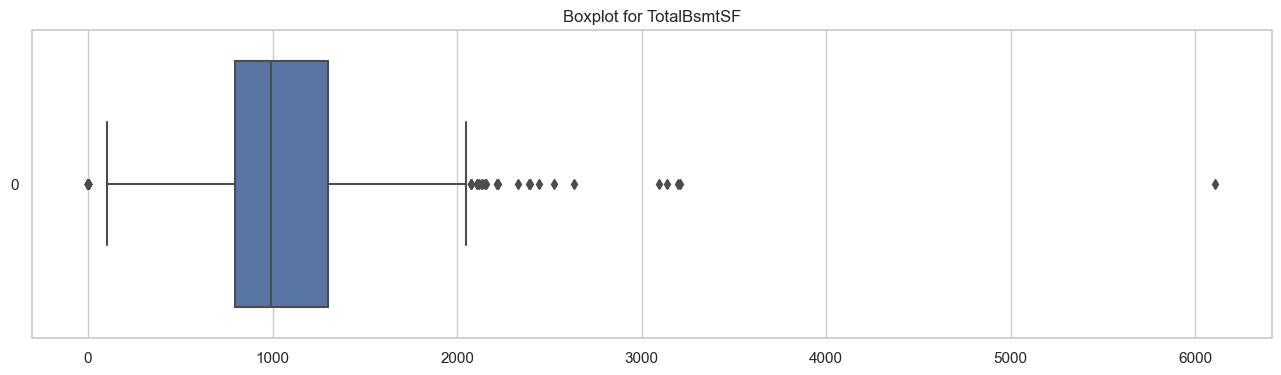

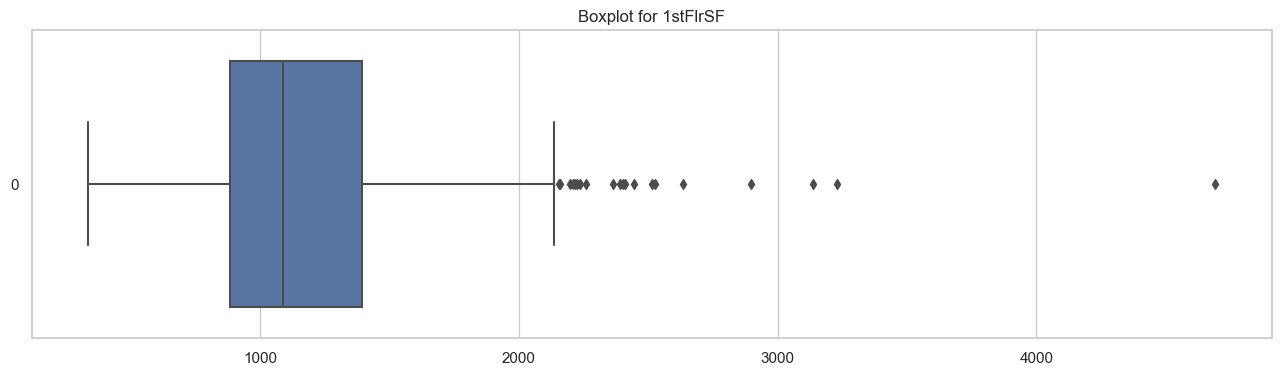

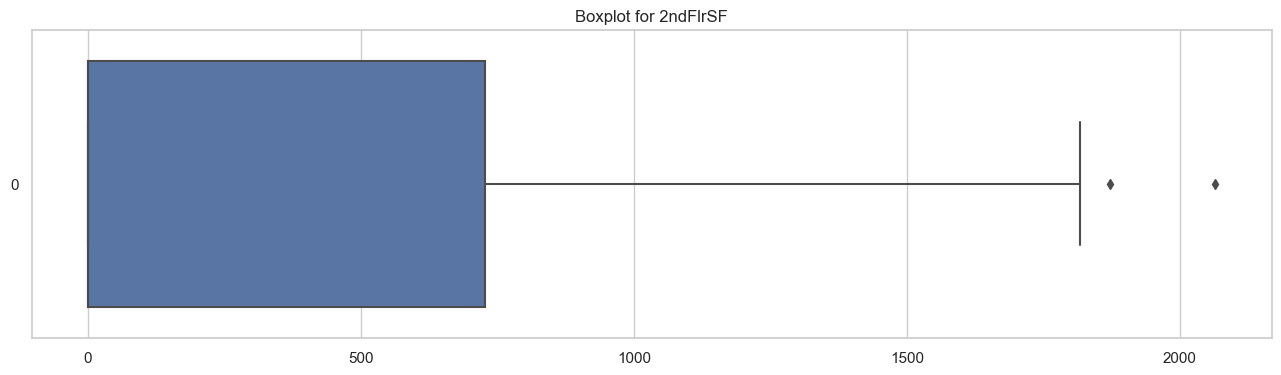

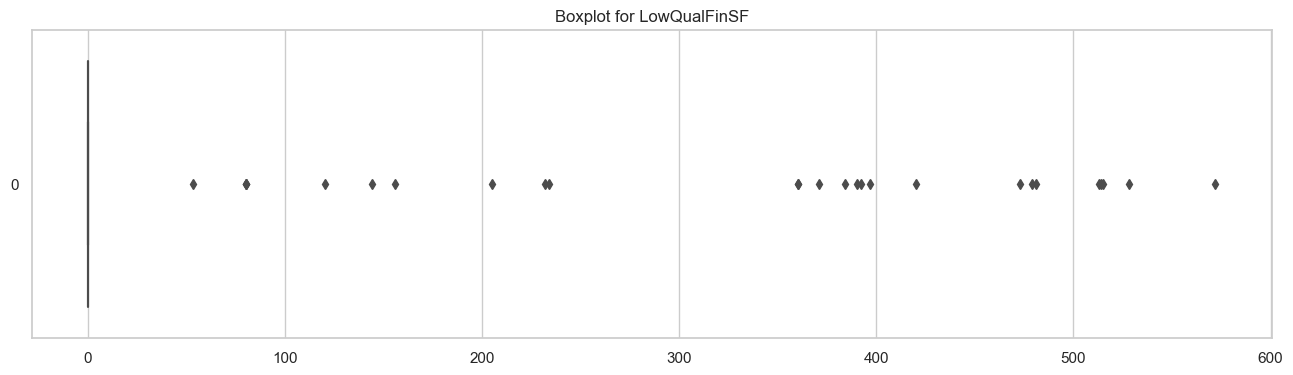

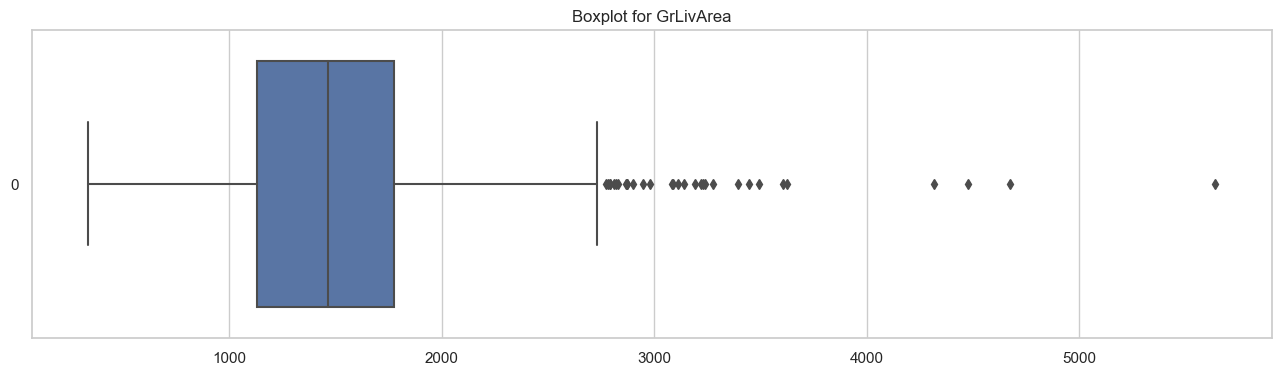

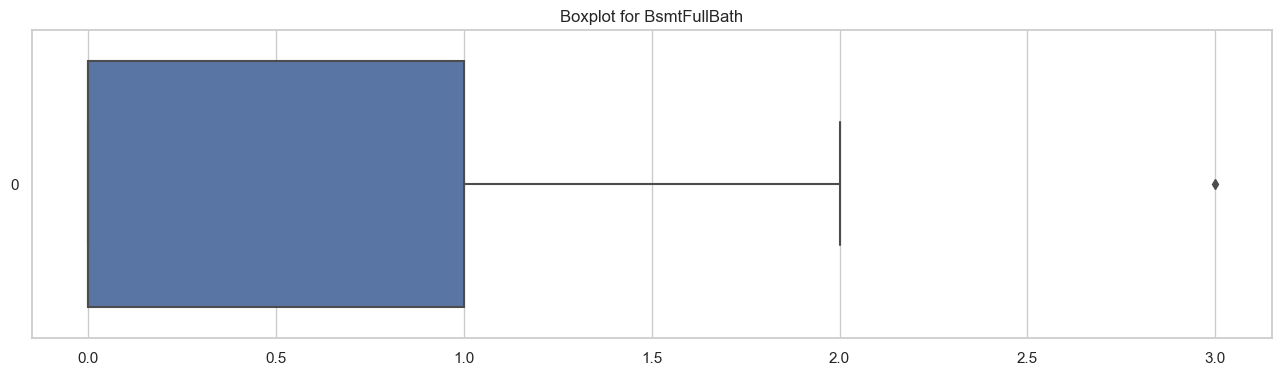

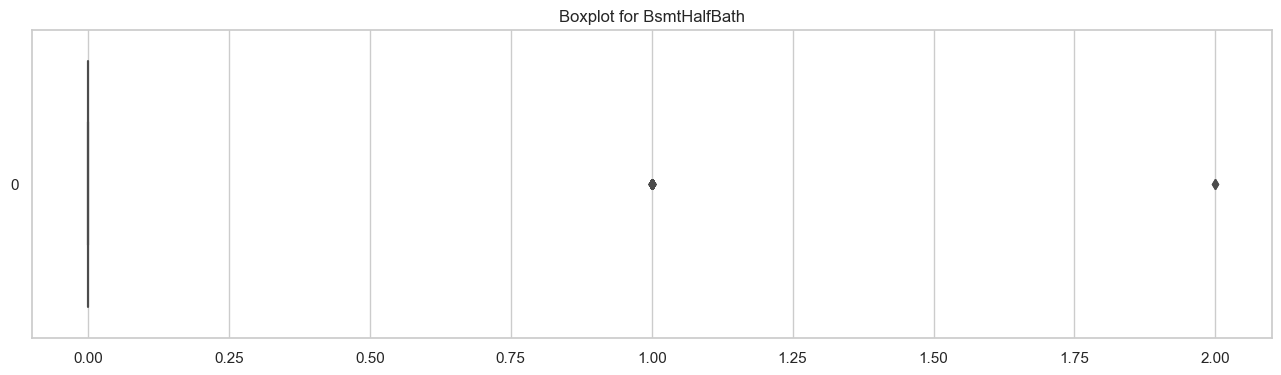

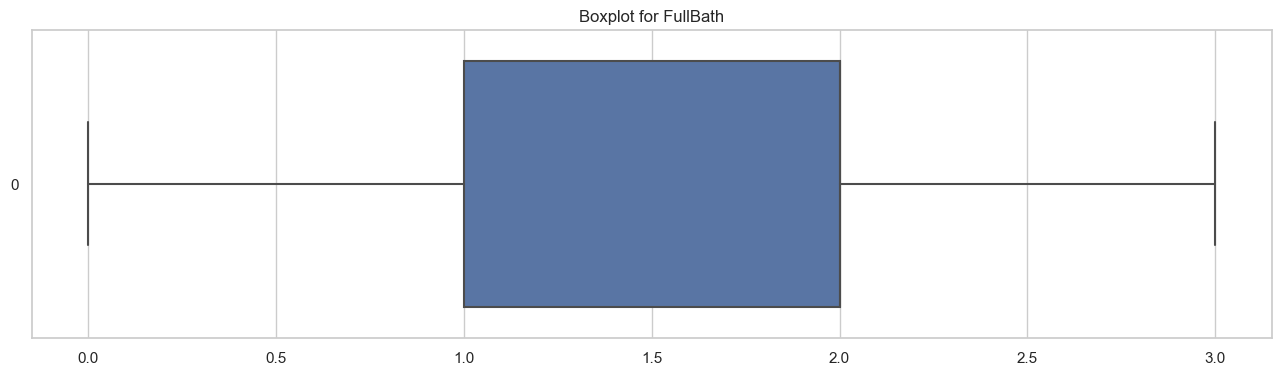

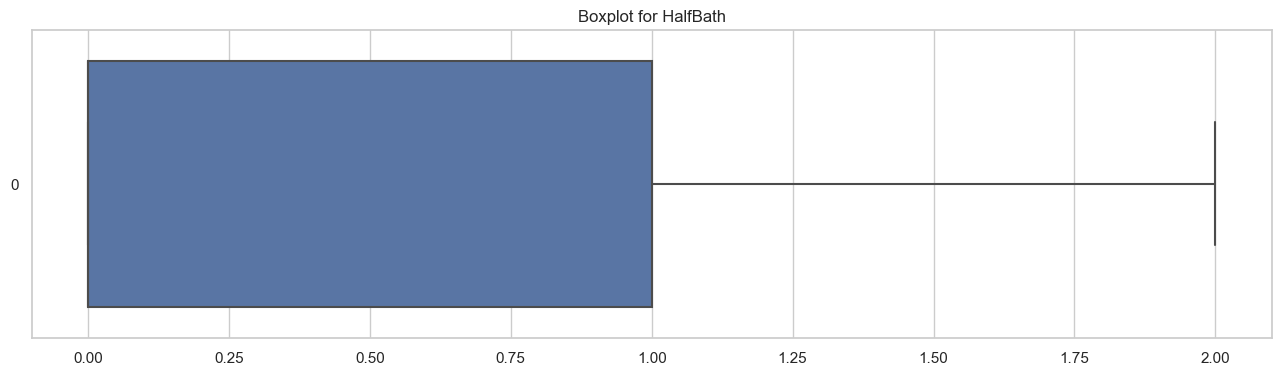

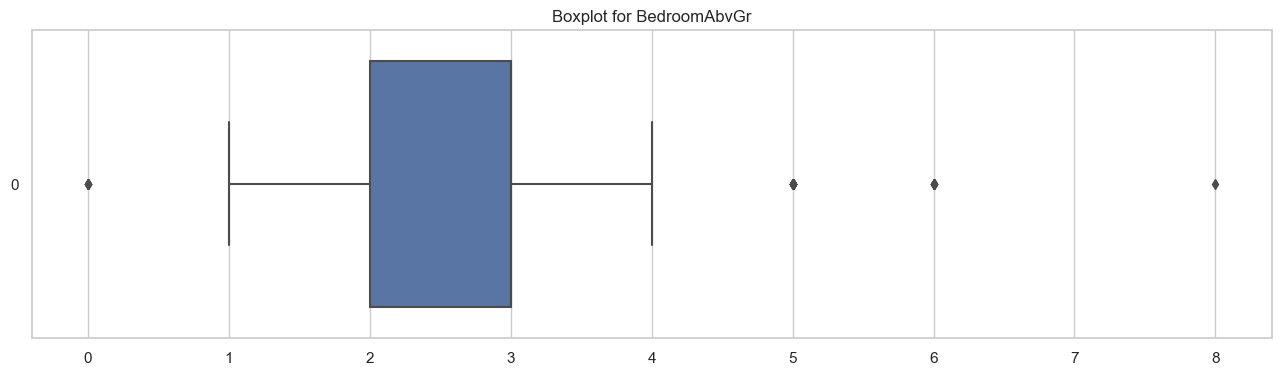

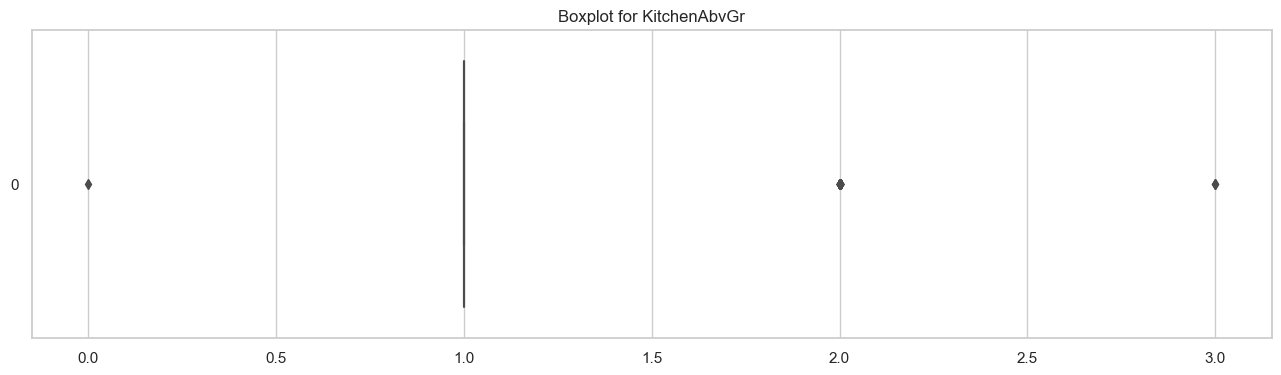

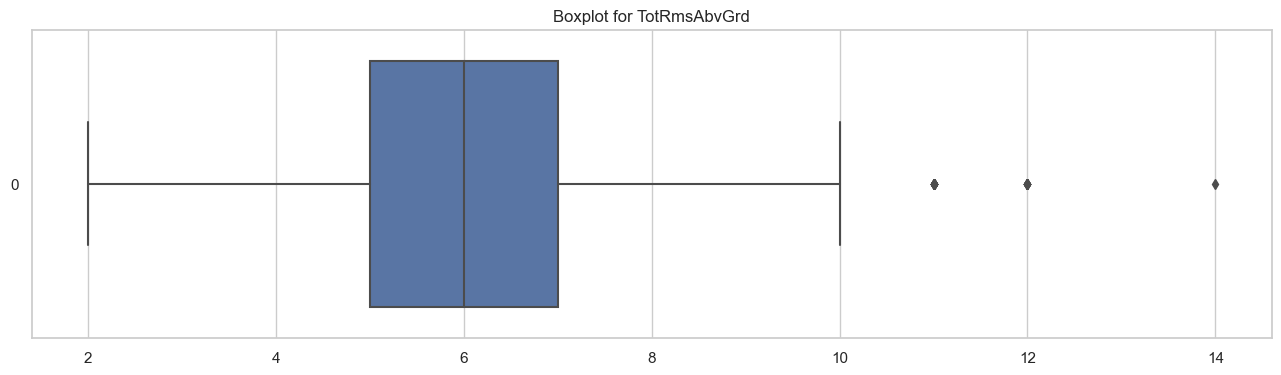

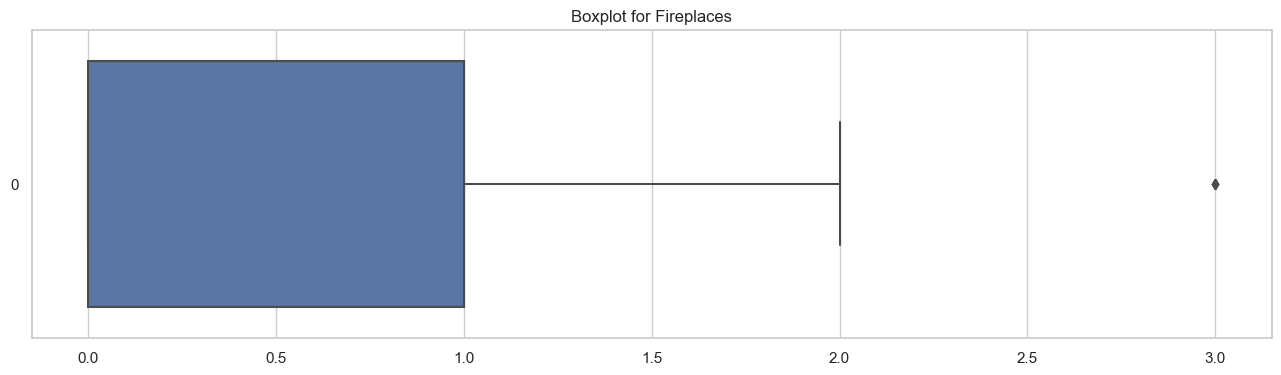

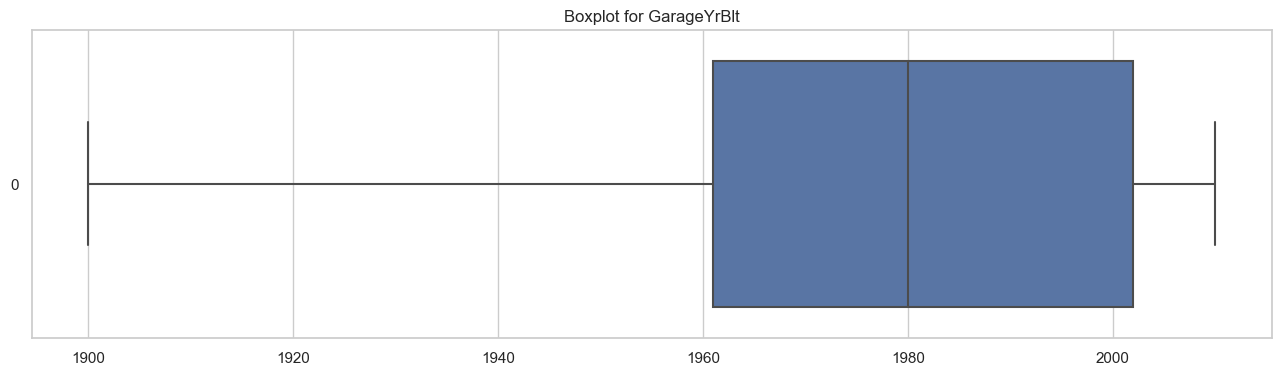

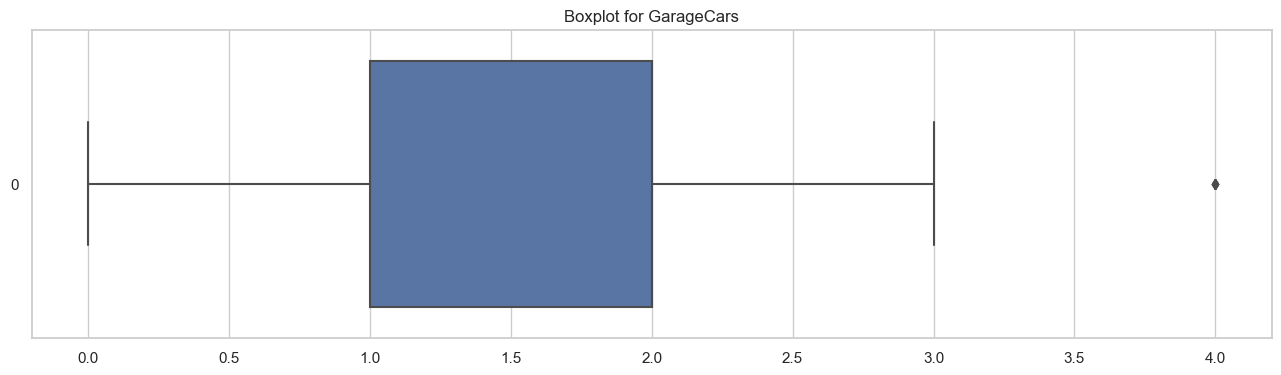

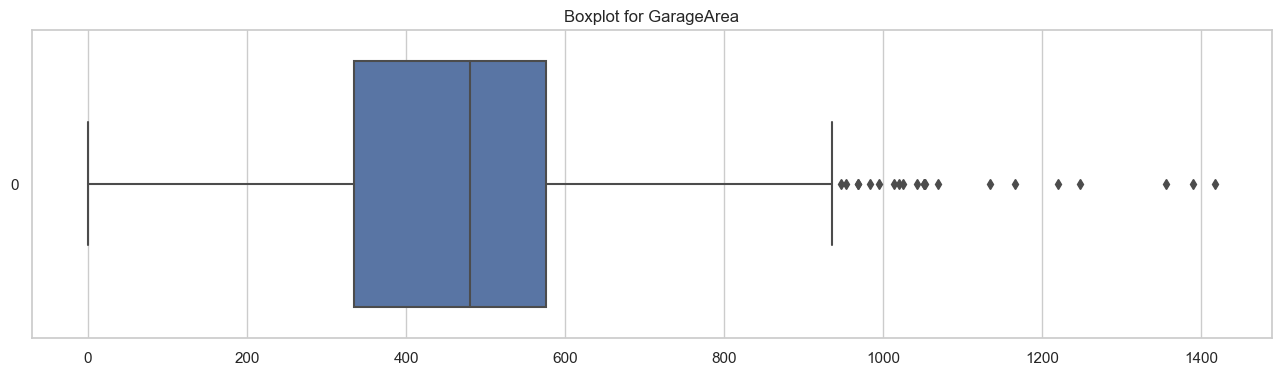

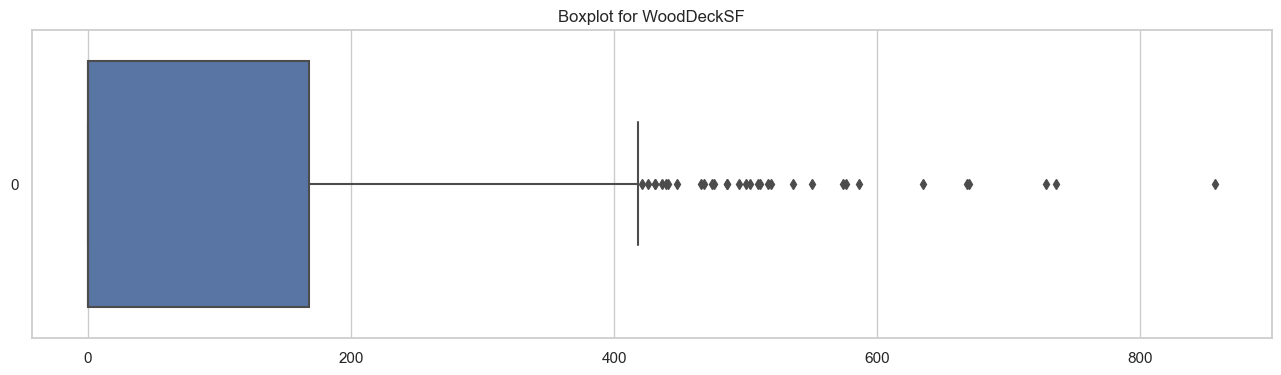

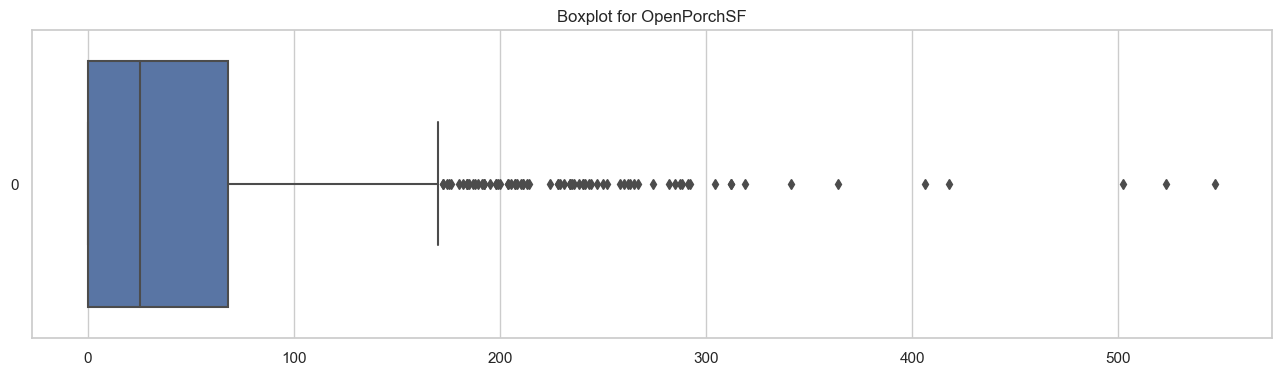

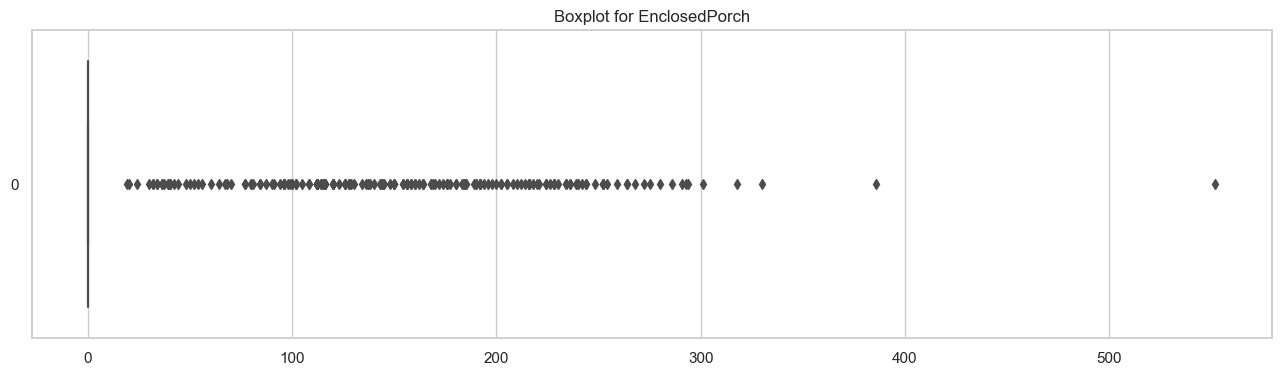

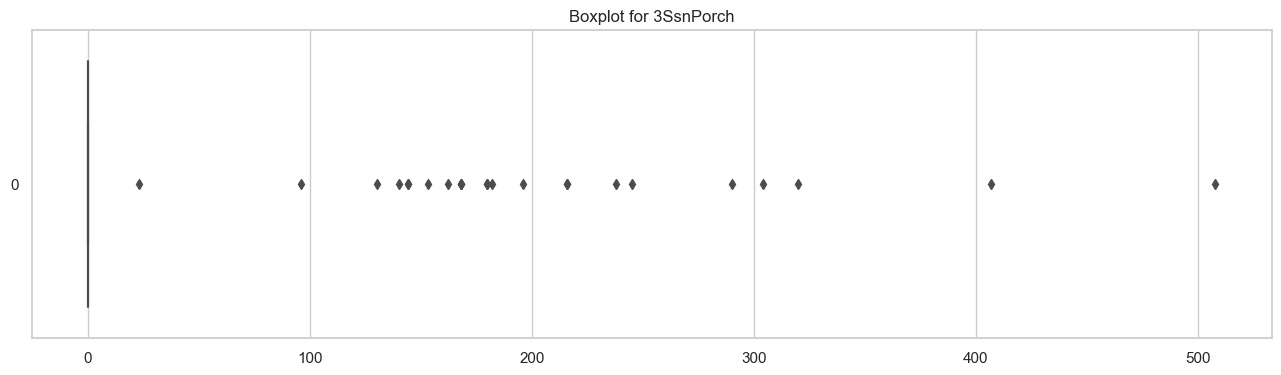

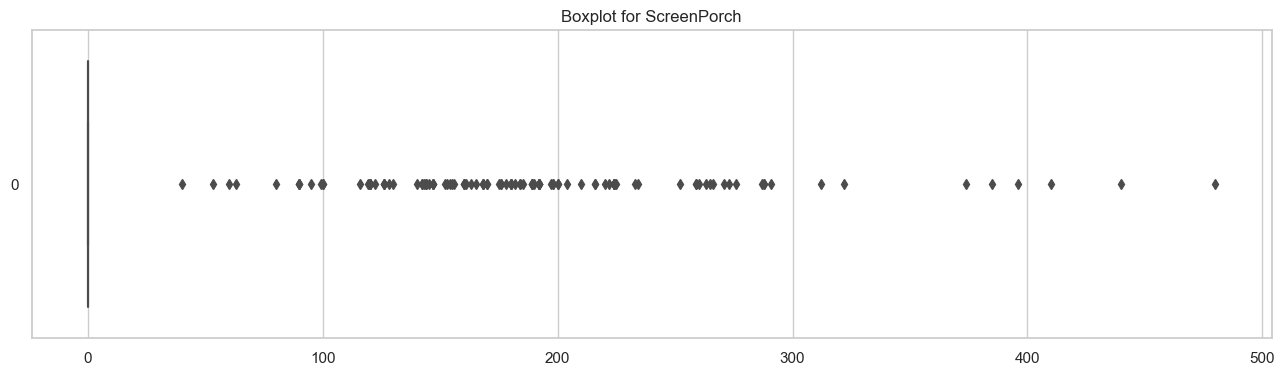

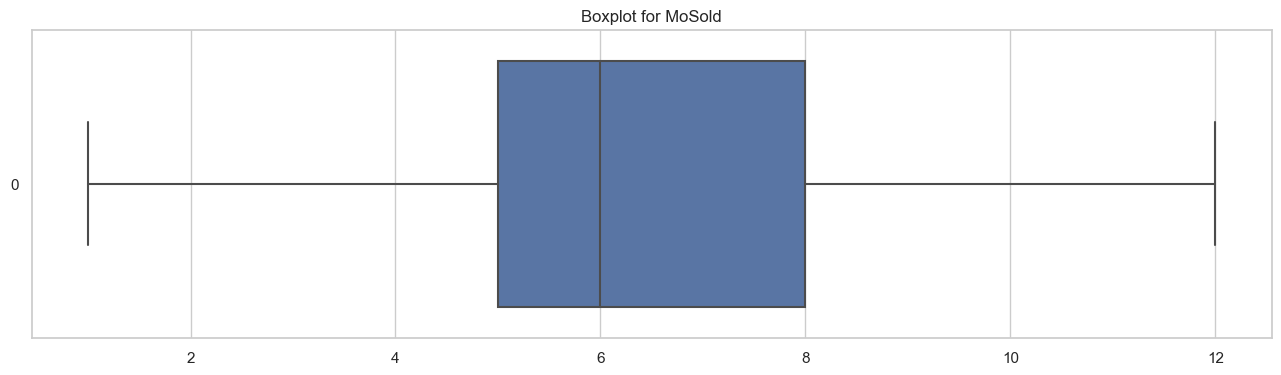

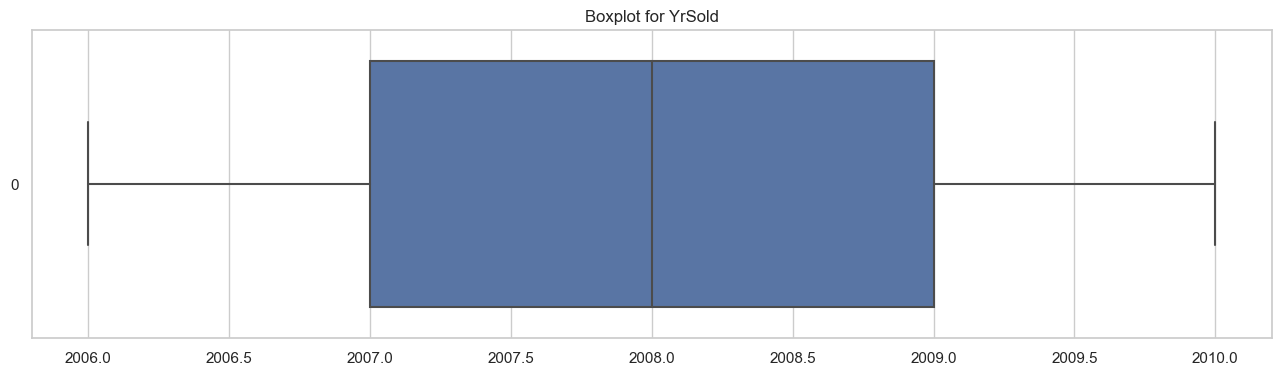

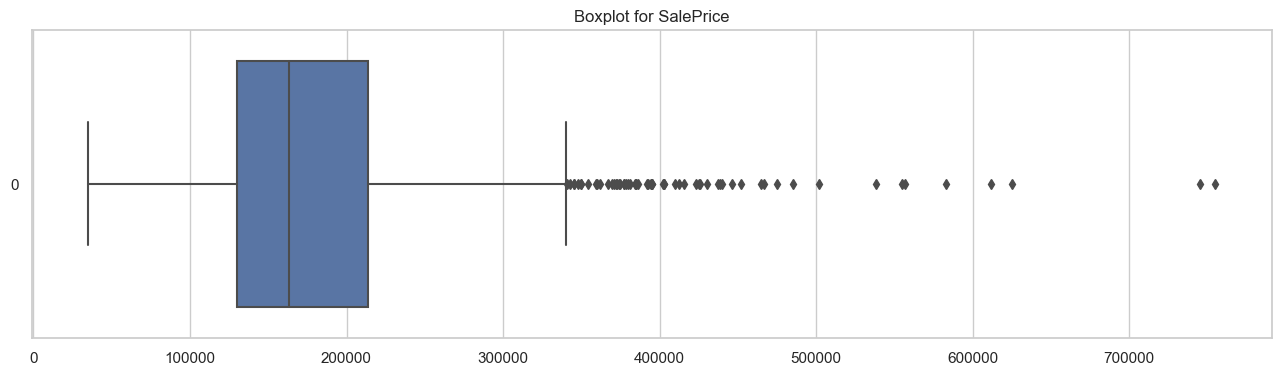

In [54]:
# find outliers for all the numerical dataset (before handling missing values)
numerical_df = df_train.select_dtypes(exclude=['object'])
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column],orient='h')
    plt.title(f"Boxplot for {column}")
    plt.show()

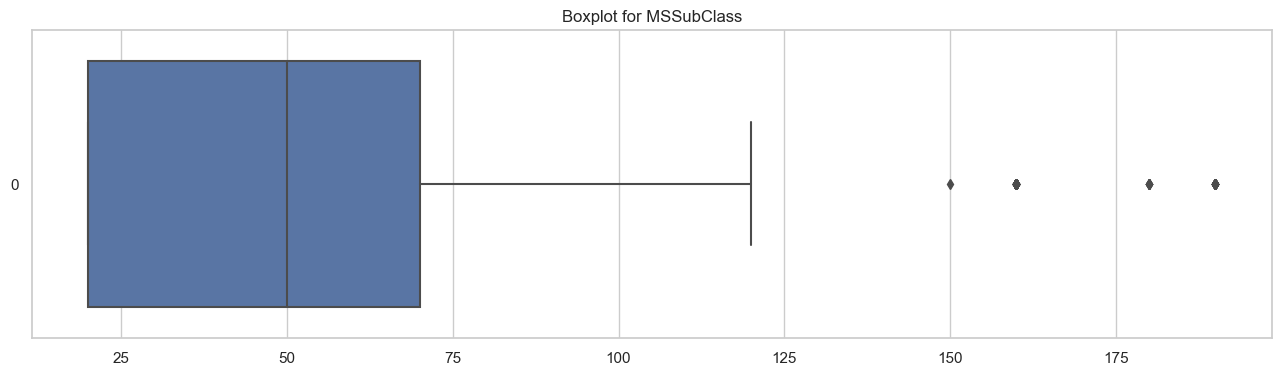

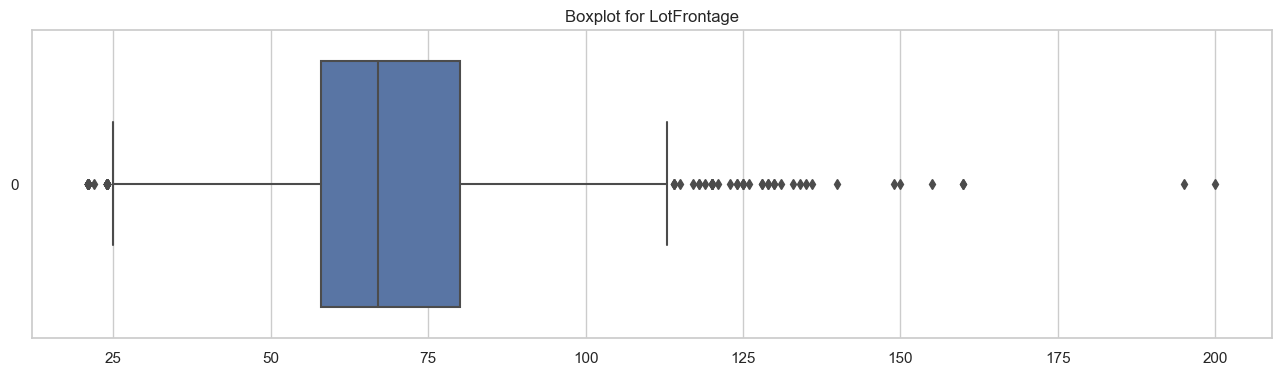

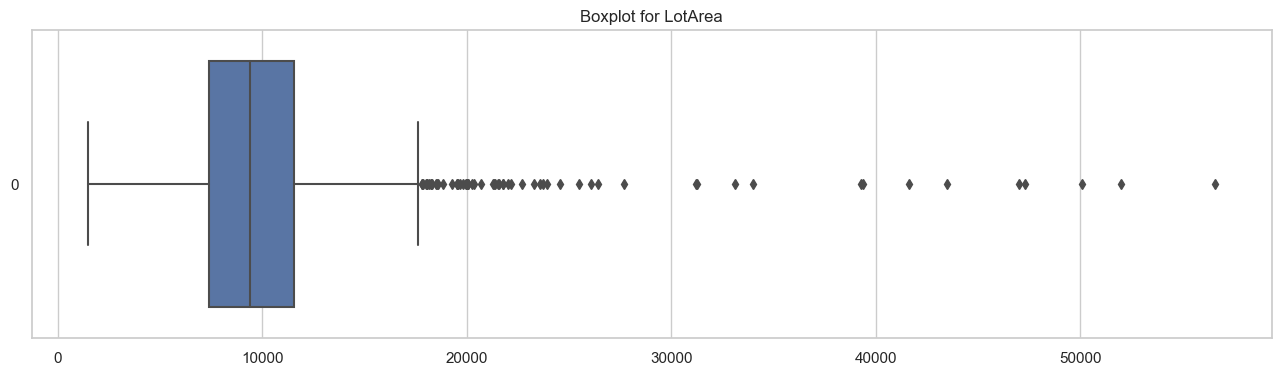

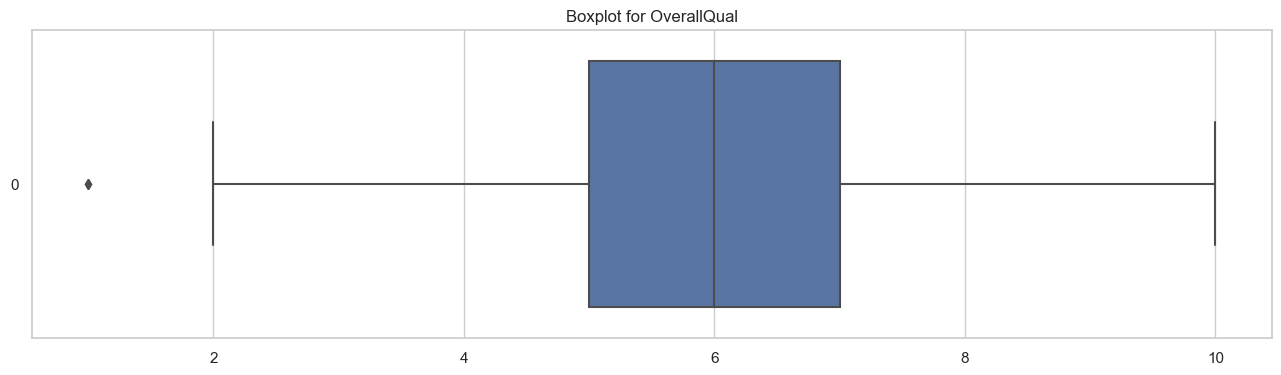

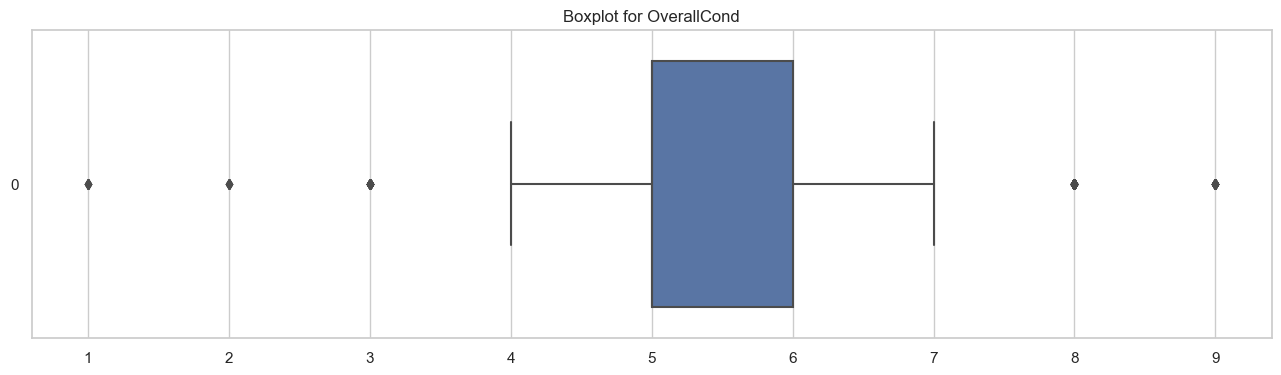

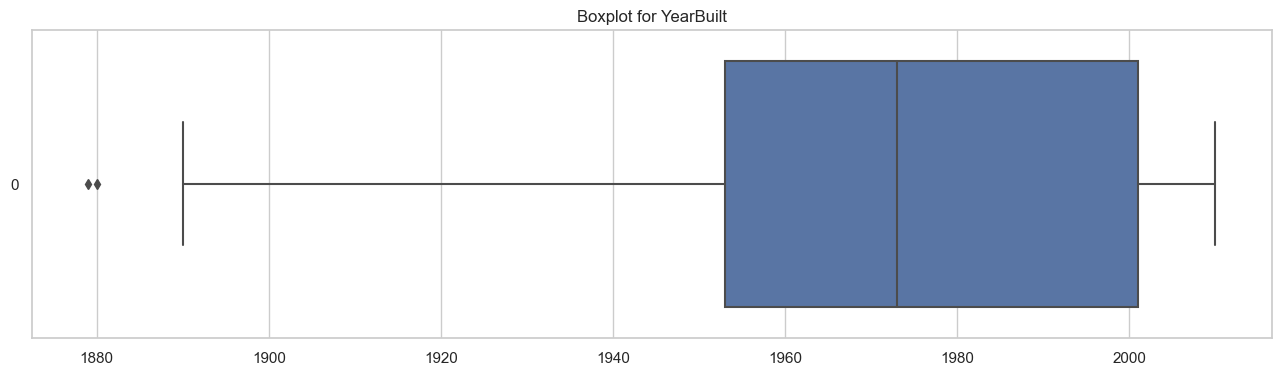

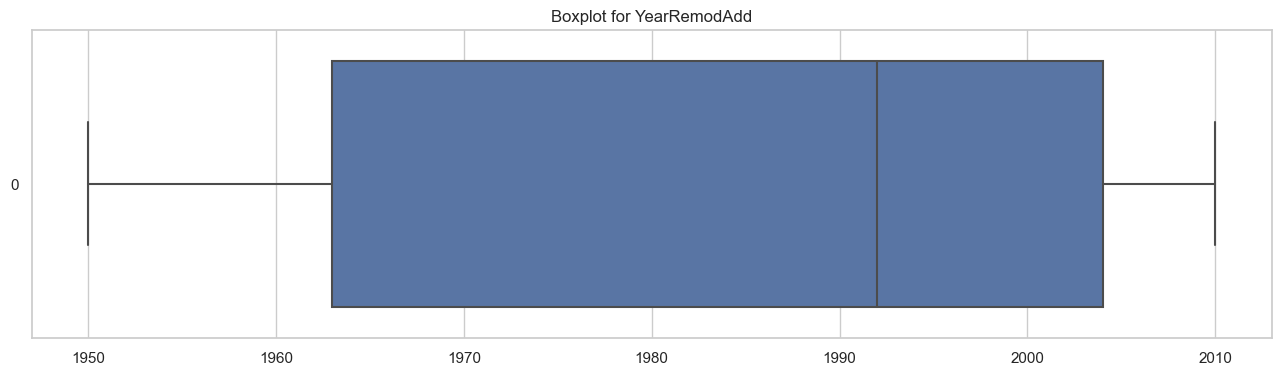

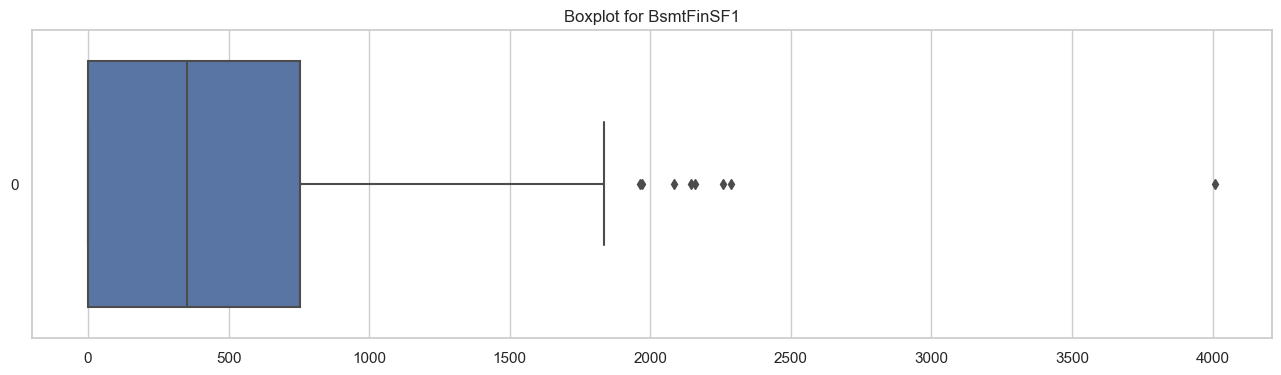

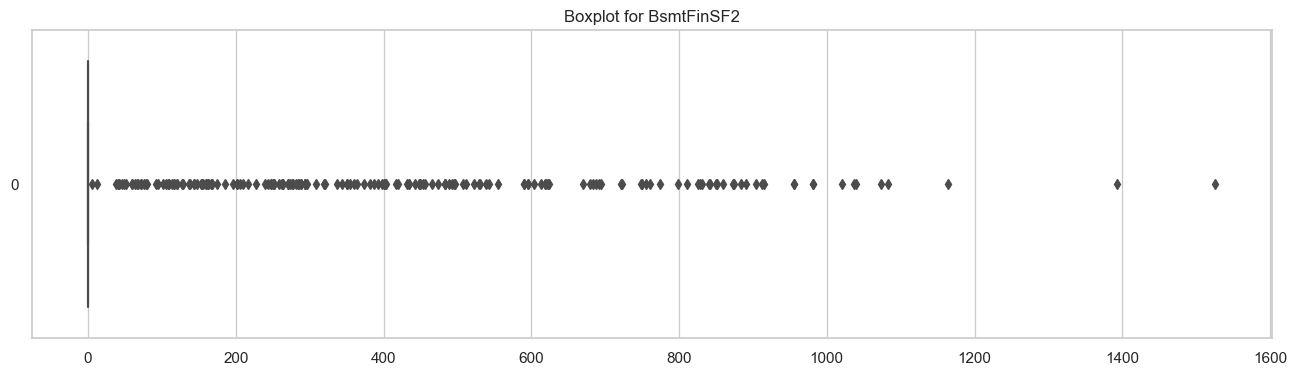

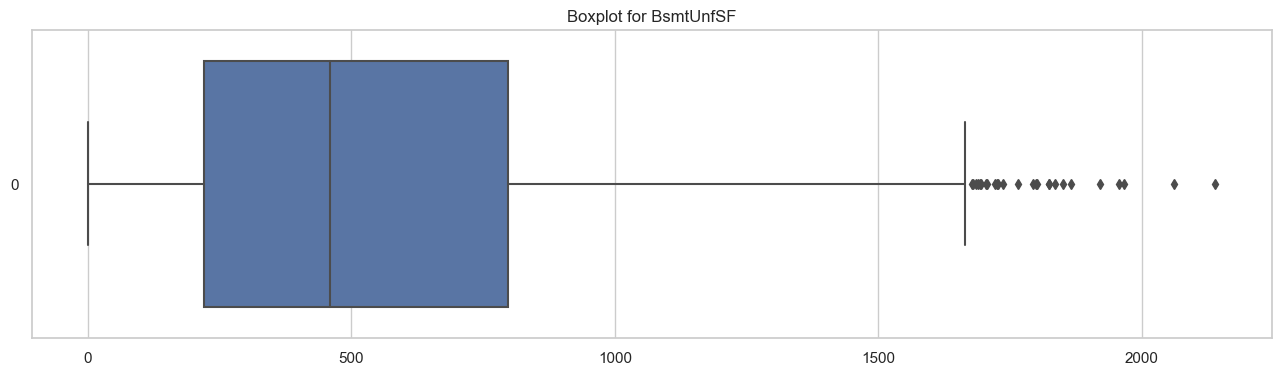

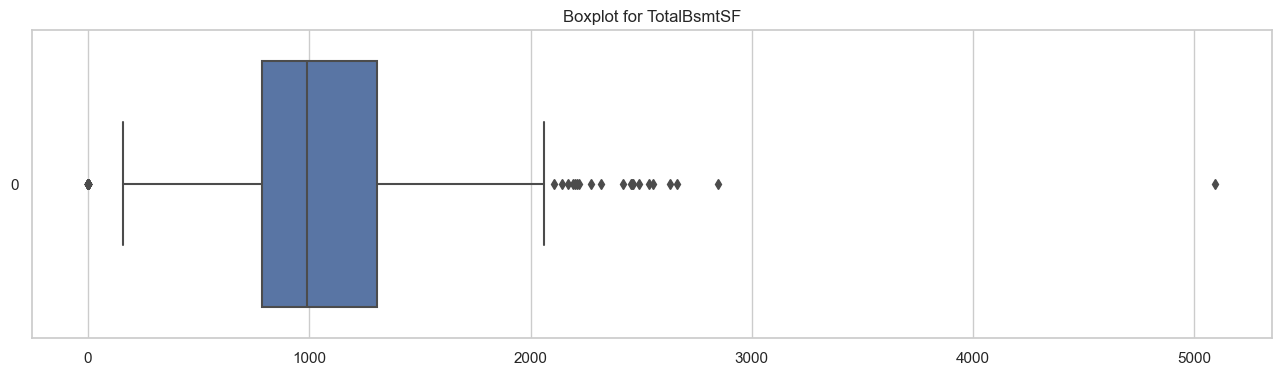

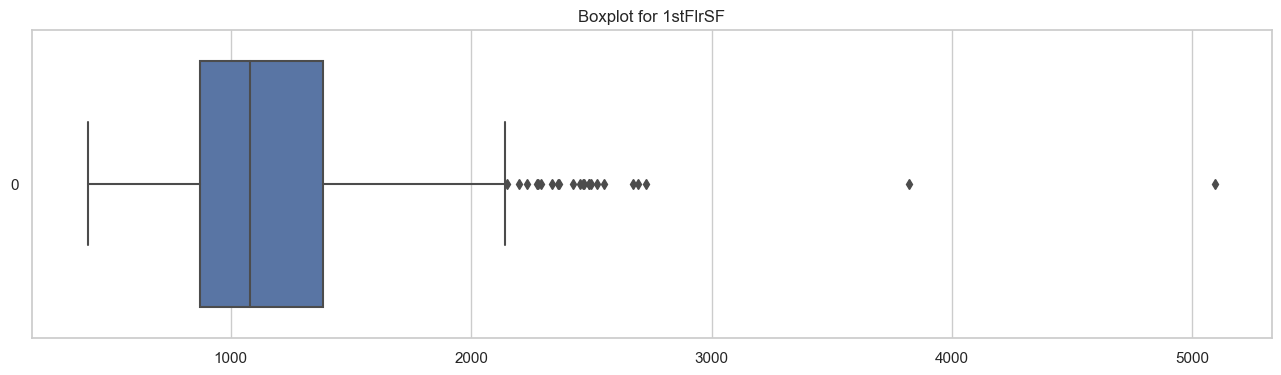

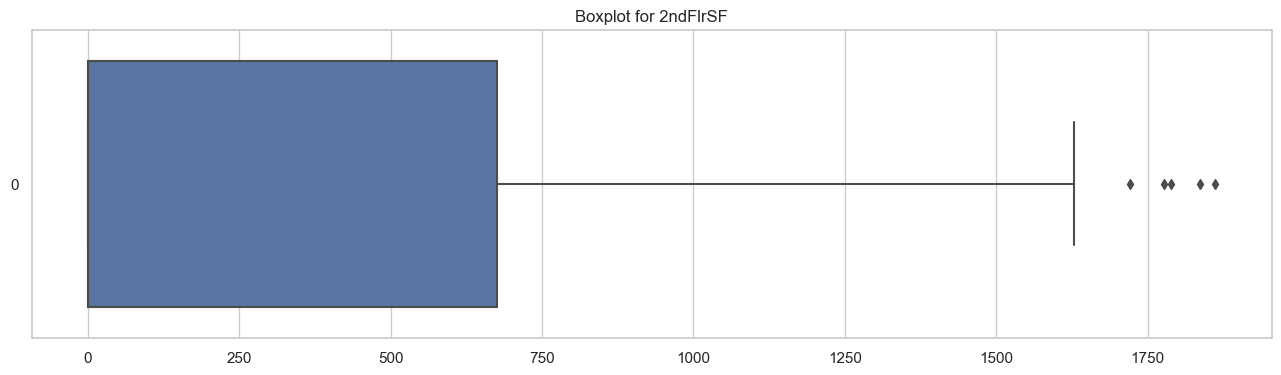

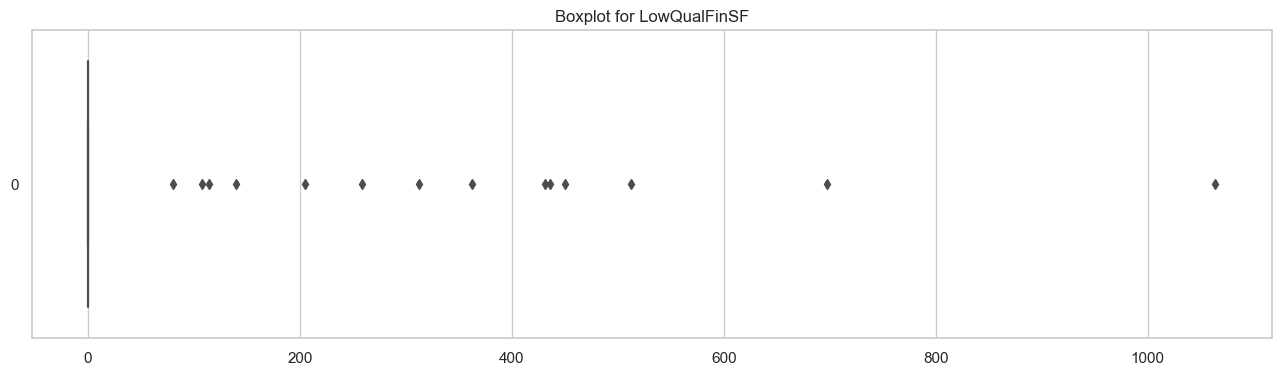

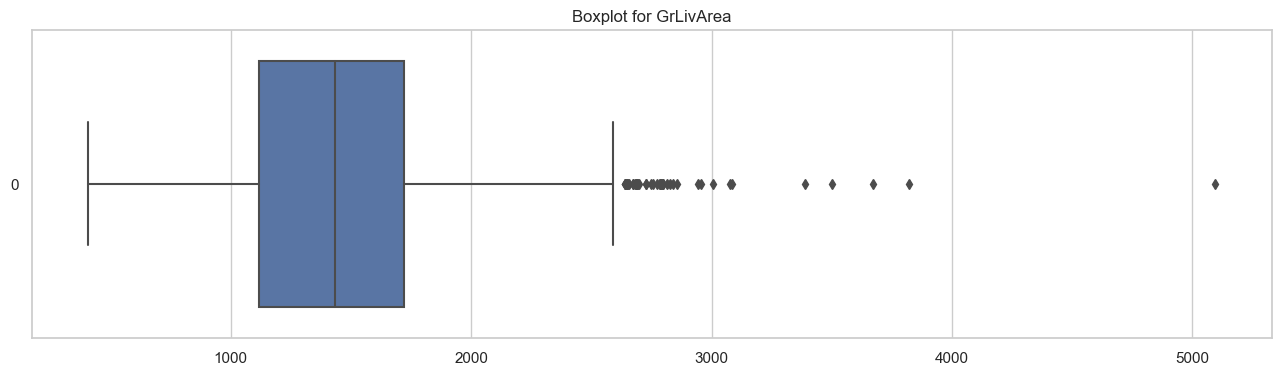

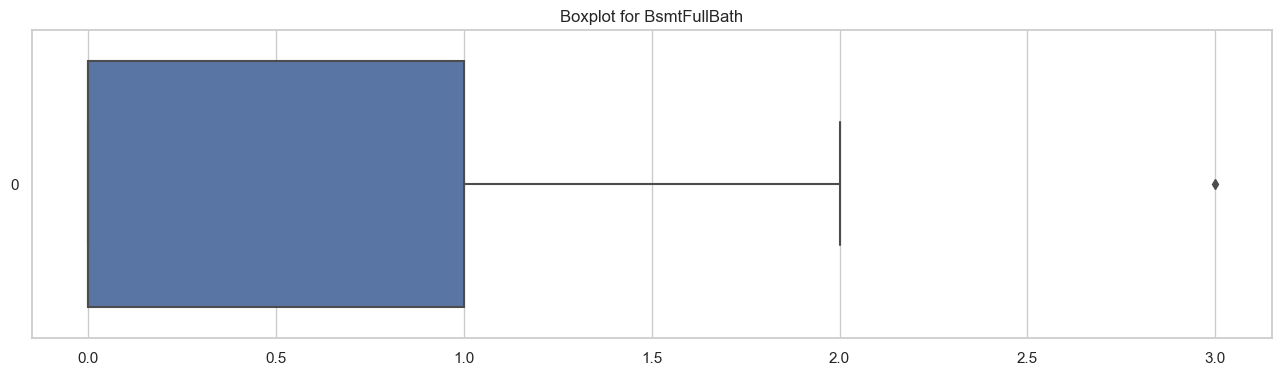

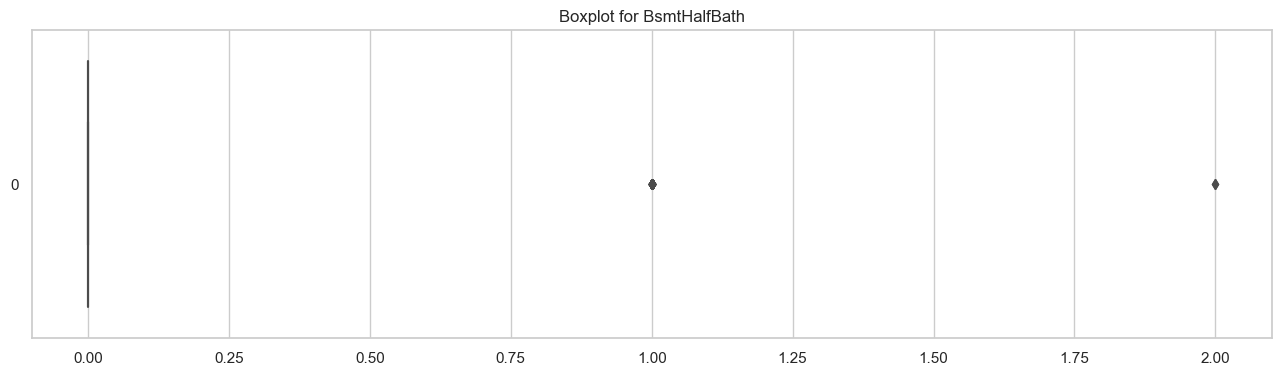

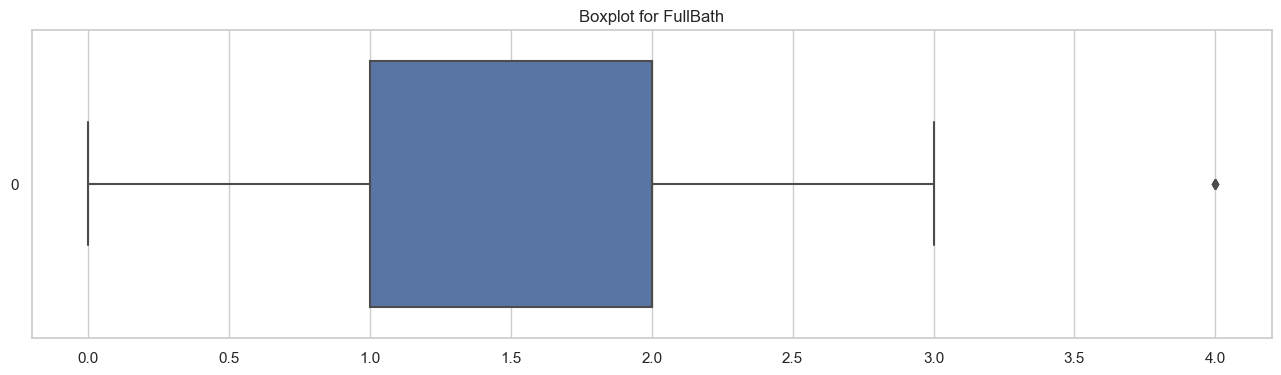

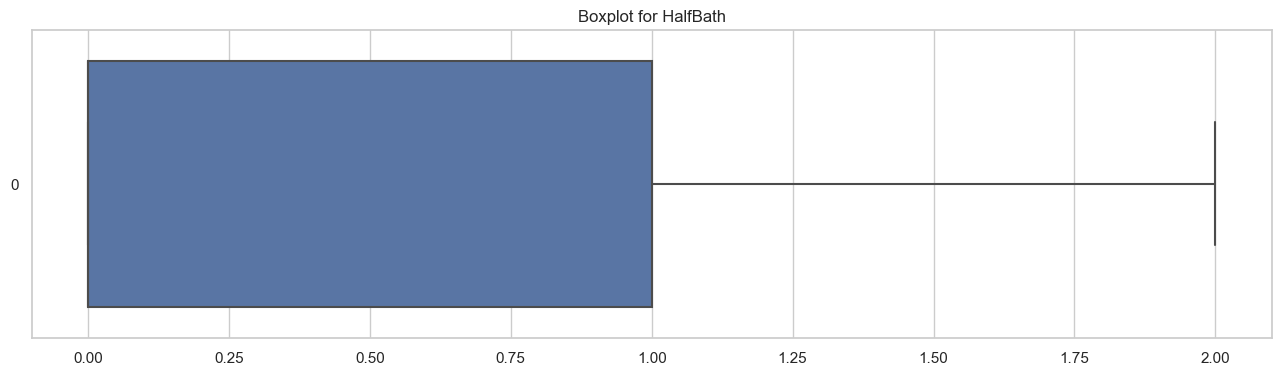

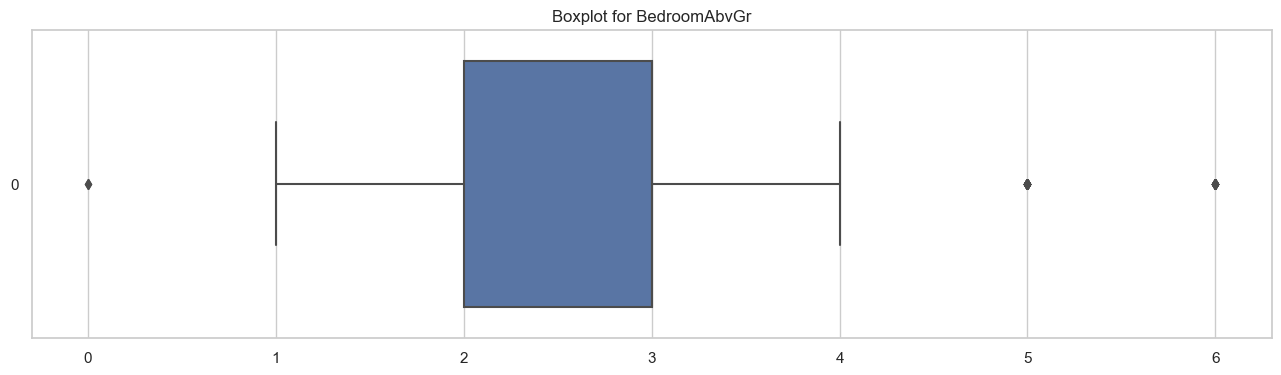

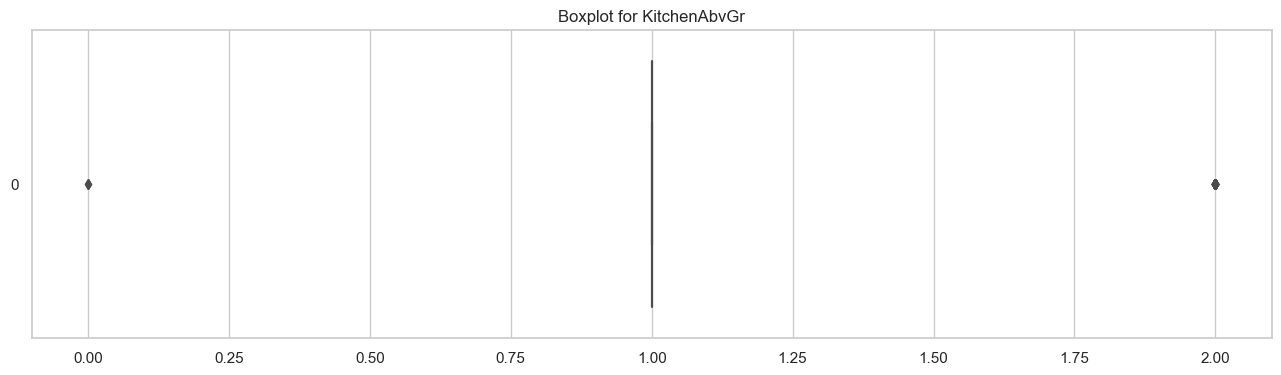

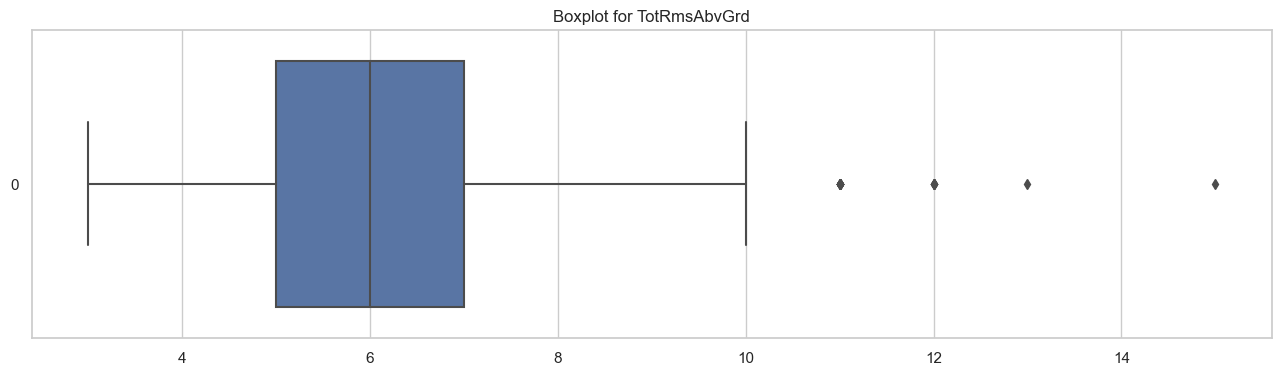

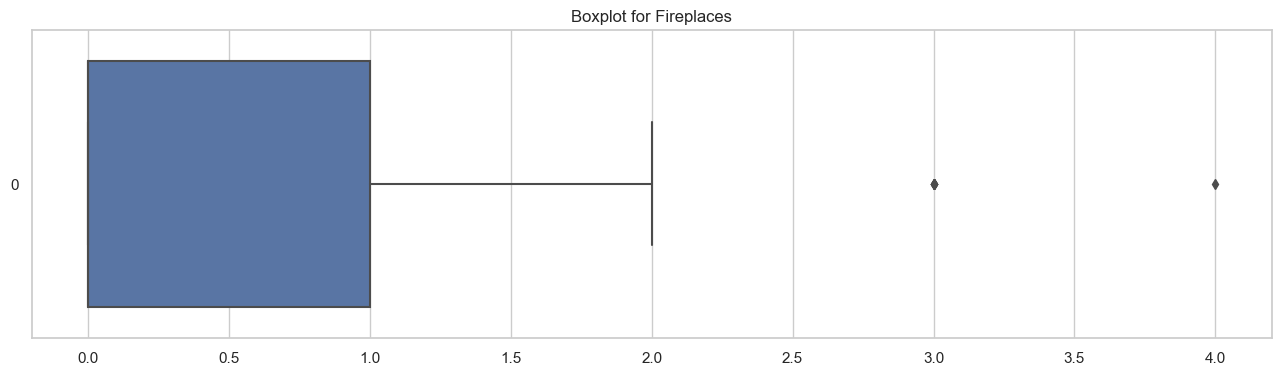

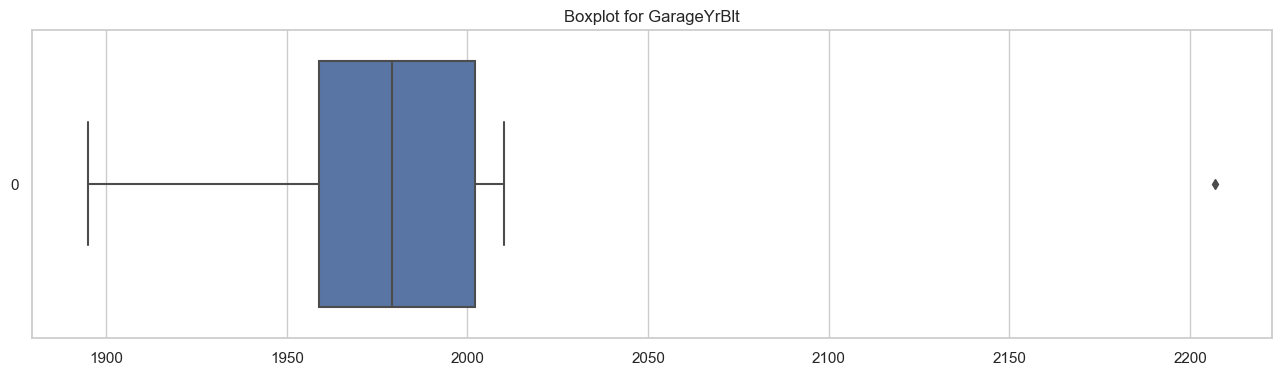

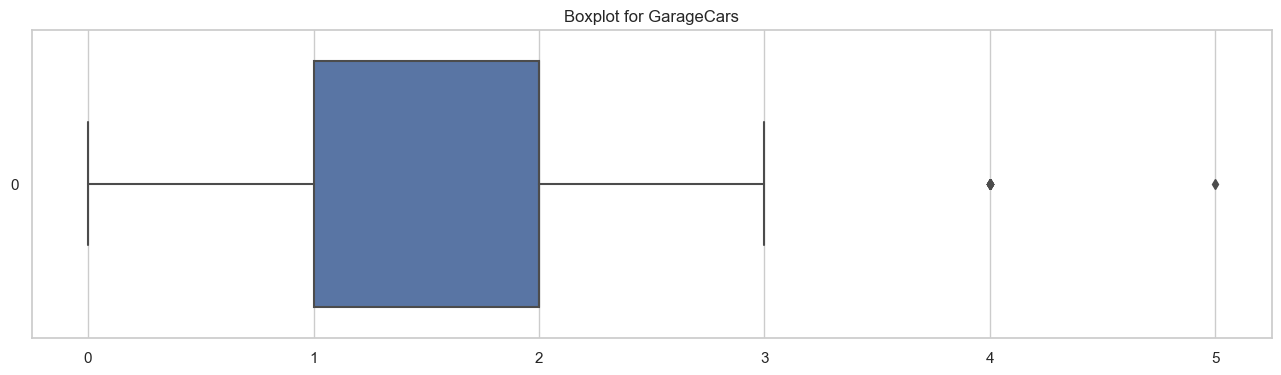

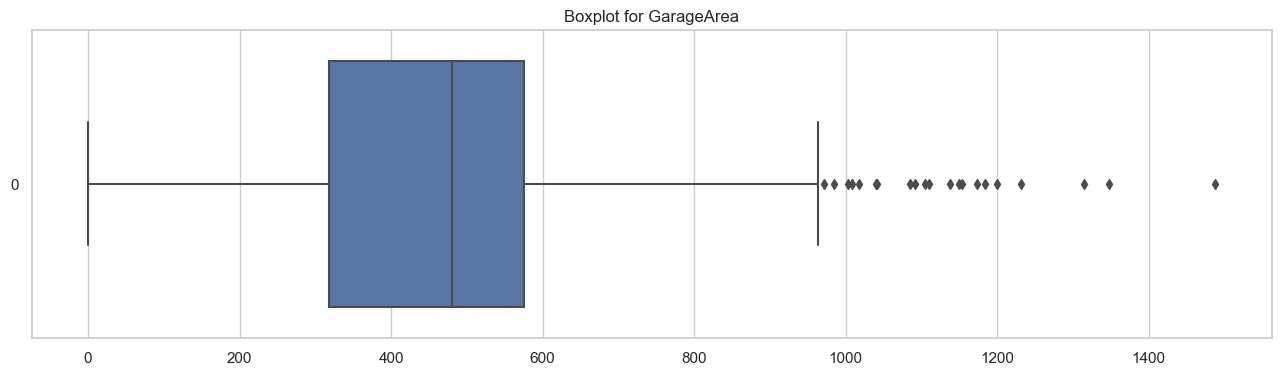

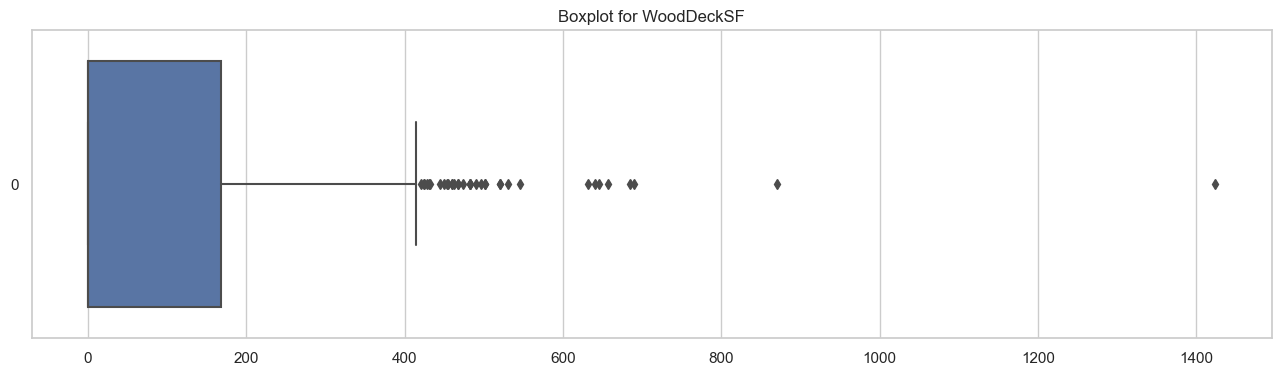

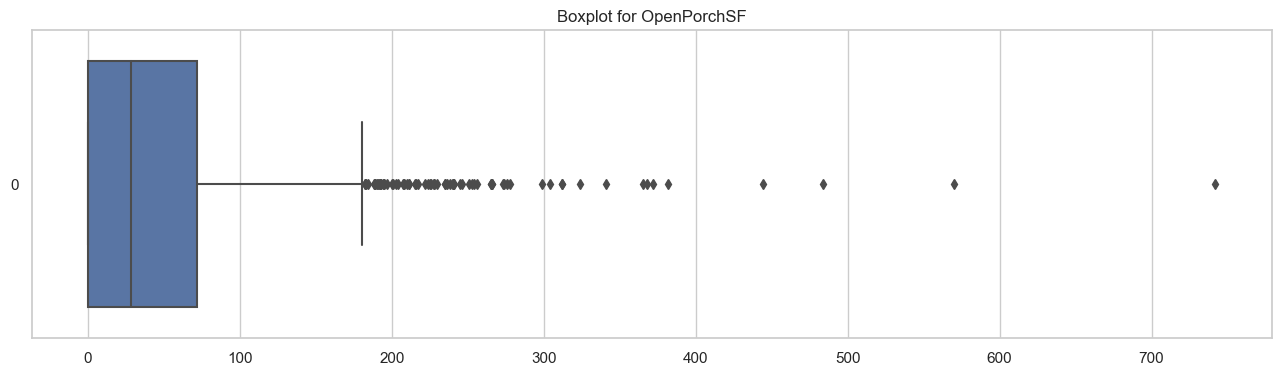

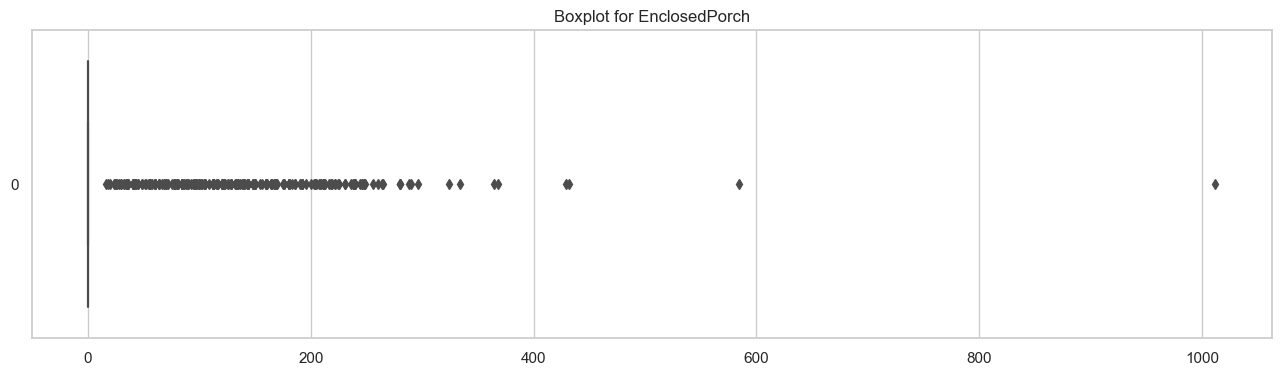

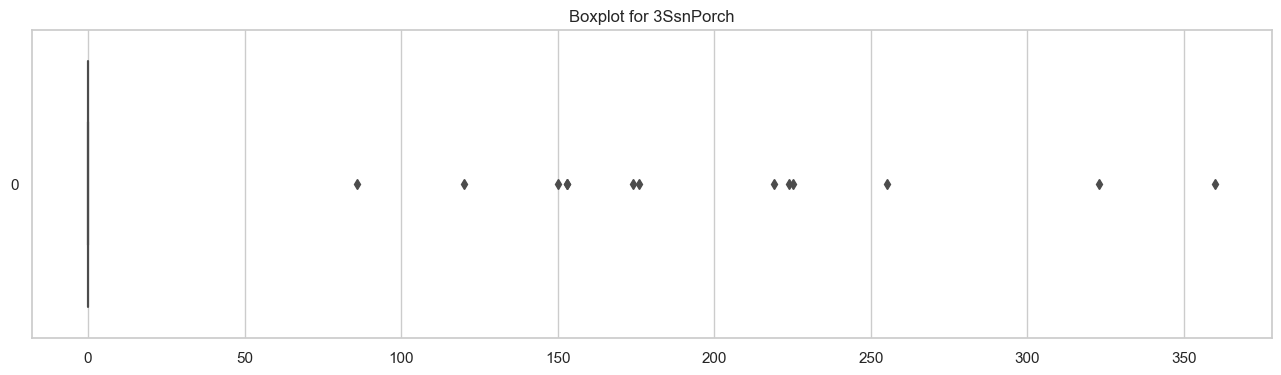

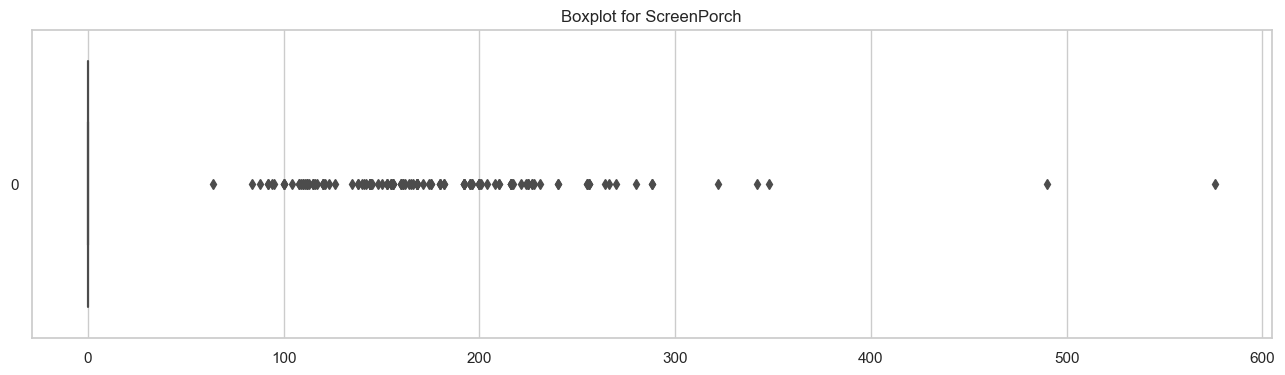

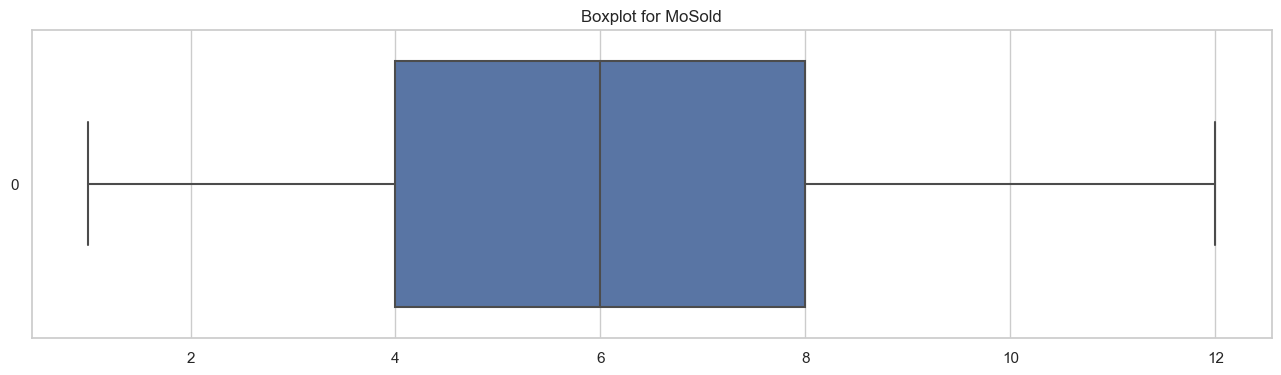

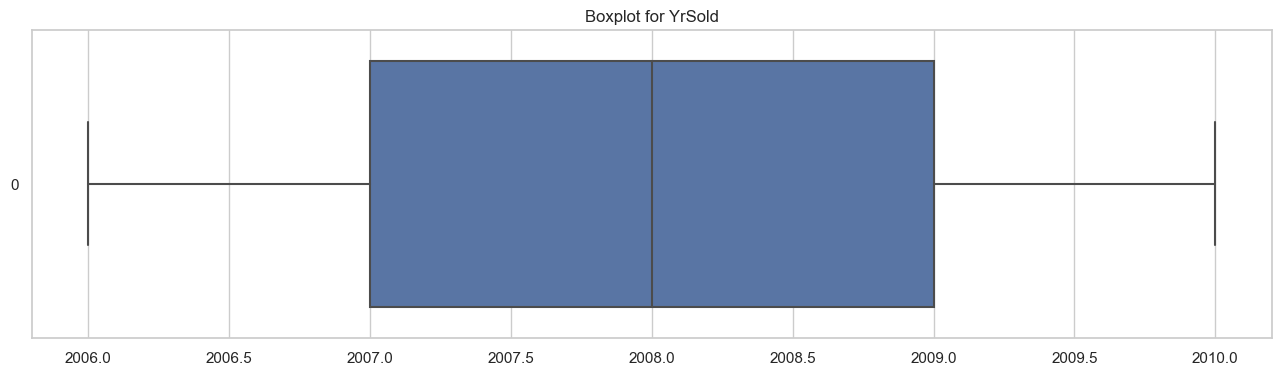

In [55]:
# find outliers for all the numerical dataset (before handling missing values)
numerical_df = df_test.select_dtypes(exclude=['object'])
for column in numerical_df:
    plt.figure(figsize=(16, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column],orient='h')
    plt.title(f"Boxplot for {column}")
    plt.show()

Both train and test dataset have many outliers so we can't impute columns with float using mean, we can either use median or remove outliers first.

In [56]:
df_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   443.639726    46.549315   567.240411   
std      30.202904     20.645407   456.098091   161.319273   441.866955   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000   223.000000   
50%    1973.000000   1994.000000   383.500000     0.000000   477.500000   
75%    2000.000000   2004.000000   712.250000     0.000000   808.000000   
max    2010.000000   2010.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1460.000000   1460.000000  1460.000000  1379.000000  1460.000000   
mean       1.046575      6.517808     0.613014  1978.506164     1.767123   
std        0.220338      1.625393     0.644666    24.689725     0.747315   
min        0.000000      2.000000     0.000000  1900.000000     0.000000   
25%        1.000000      5.000000     0.000000  1961.000000     1.000000   
50%        1.000000      6.000000     1.000000  1980.000000     2.000000   
75%        1.000000      7.000000     1.000000  2002.000000     2.000000   
max        3.000000     14.000000     3.000000  2010.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000 

In [57]:
df_test.describe()

MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
count  1459.000000  1232.000000   1459.000000  1459.000000  1459.000000   
mean     57.378341    68.580357   9819.161069     6.078821     5.553804   
std      42.746880    22.376841   4955.517327     1.436812     1.113740   
min      20.000000    21.000000   1470.000000     1.000000     1.000000   
25%      20.000000    58.000000   7391.000000     5.000000     5.000000   
50%      50.000000    67.000000   9399.000000     6.000000     5.000000   
75%      70.000000    80.000000  11517.500000     7.000000     6.000000   
max     190.000000   200.000000  56600.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1459.000000   1459.000000  1458.000000  1458.000000  1458.000000   
mean   1971.357779   1983.662783   439.203704    52.619342   554.294925   
std      30.390071     21.130467   455.268042   176.753926   437.260486   
min    1879.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.000000   1963.000000     0.000000     0.000000   219.250000   
50%    1973.000000   1992.000000   350.500000     0.000000   460.000000   
75%    2001.000000   2004.000000   753.500000     0.000000   797.750000   
max    2010.000000   2010.000000  4010.000000  1526.000000  2140.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1458.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean   1046.117970  1156.534613   325.967786      3.543523  1486.045922   
std     442.898624   398.165820   420.610226     44.043251   485.566099   
min       0.000000   407.000000     0.000000      0.000000   407.000000   
25%     784.000000   873.500000     0.000000      0.000000  1117.500000   
50%     988.000000  1079.000000     0.000000      0.000000  1432.000000   
75%    1305.000000  1382.500000   676.000000      0.000000  1721.000000   
max    5095.000000  5095.000000  1862.000000   1064.000000  5095.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1457.000000   1457.000000  1459.000000  1459.000000   1459.000000   
mean       0.434454      0.065202     1.570939     0.377656      2.854010   
std        0.530648      0.252468     0.555190     0.503017      0.829788   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     4.000000     2.000000      6.000000   

       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt   GarageCars  \
count   1459.000000   1459.000000  1459.00000  1381.000000  1458.000000   
mean       1.042495      6.385195     0.58122  1977.721217     1.766118   
std        0.208472      1.508895     0.64742    26.431175     0.775945   
min        0.000000      3.000000     0.00000  1895.000000     0.000000   
25%        1.000000      5.000000     0.00000  1959.000000     1.000000   
50%        1.000000      6.000000     0.00000  1979.000000     2.000000   
75%        1.000000      7.000000     1.00000  2002.000000     2.000000   
max        2.000000     15.000000     4.00000  2207.000000     5.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
ma

Mean and Median dont have huge difference in range for the most of the columns that need imputation.

In [58]:
def df_hist(df):
# Get all columns
    columns = df.columns

    # Set the figure size
    plt.figure(figsize=(15, 45))

    # Loop through each column and plot the histogram
    for i, col in enumerate(columns):
        plt.subplot(27, 3, i + 1)  # Subplot arrangement with 4 rows and 3 columns for better visualization
        sns.histplot(df[col])
        plt.title(f'Histogram of {col}', fontsize=12)
        plt.xlabel(col, fontsize=10)
        plt.ylabel('Frequency', fontsize=10)
        plt.tight_layout()

    # Show the plot
    plt.show()

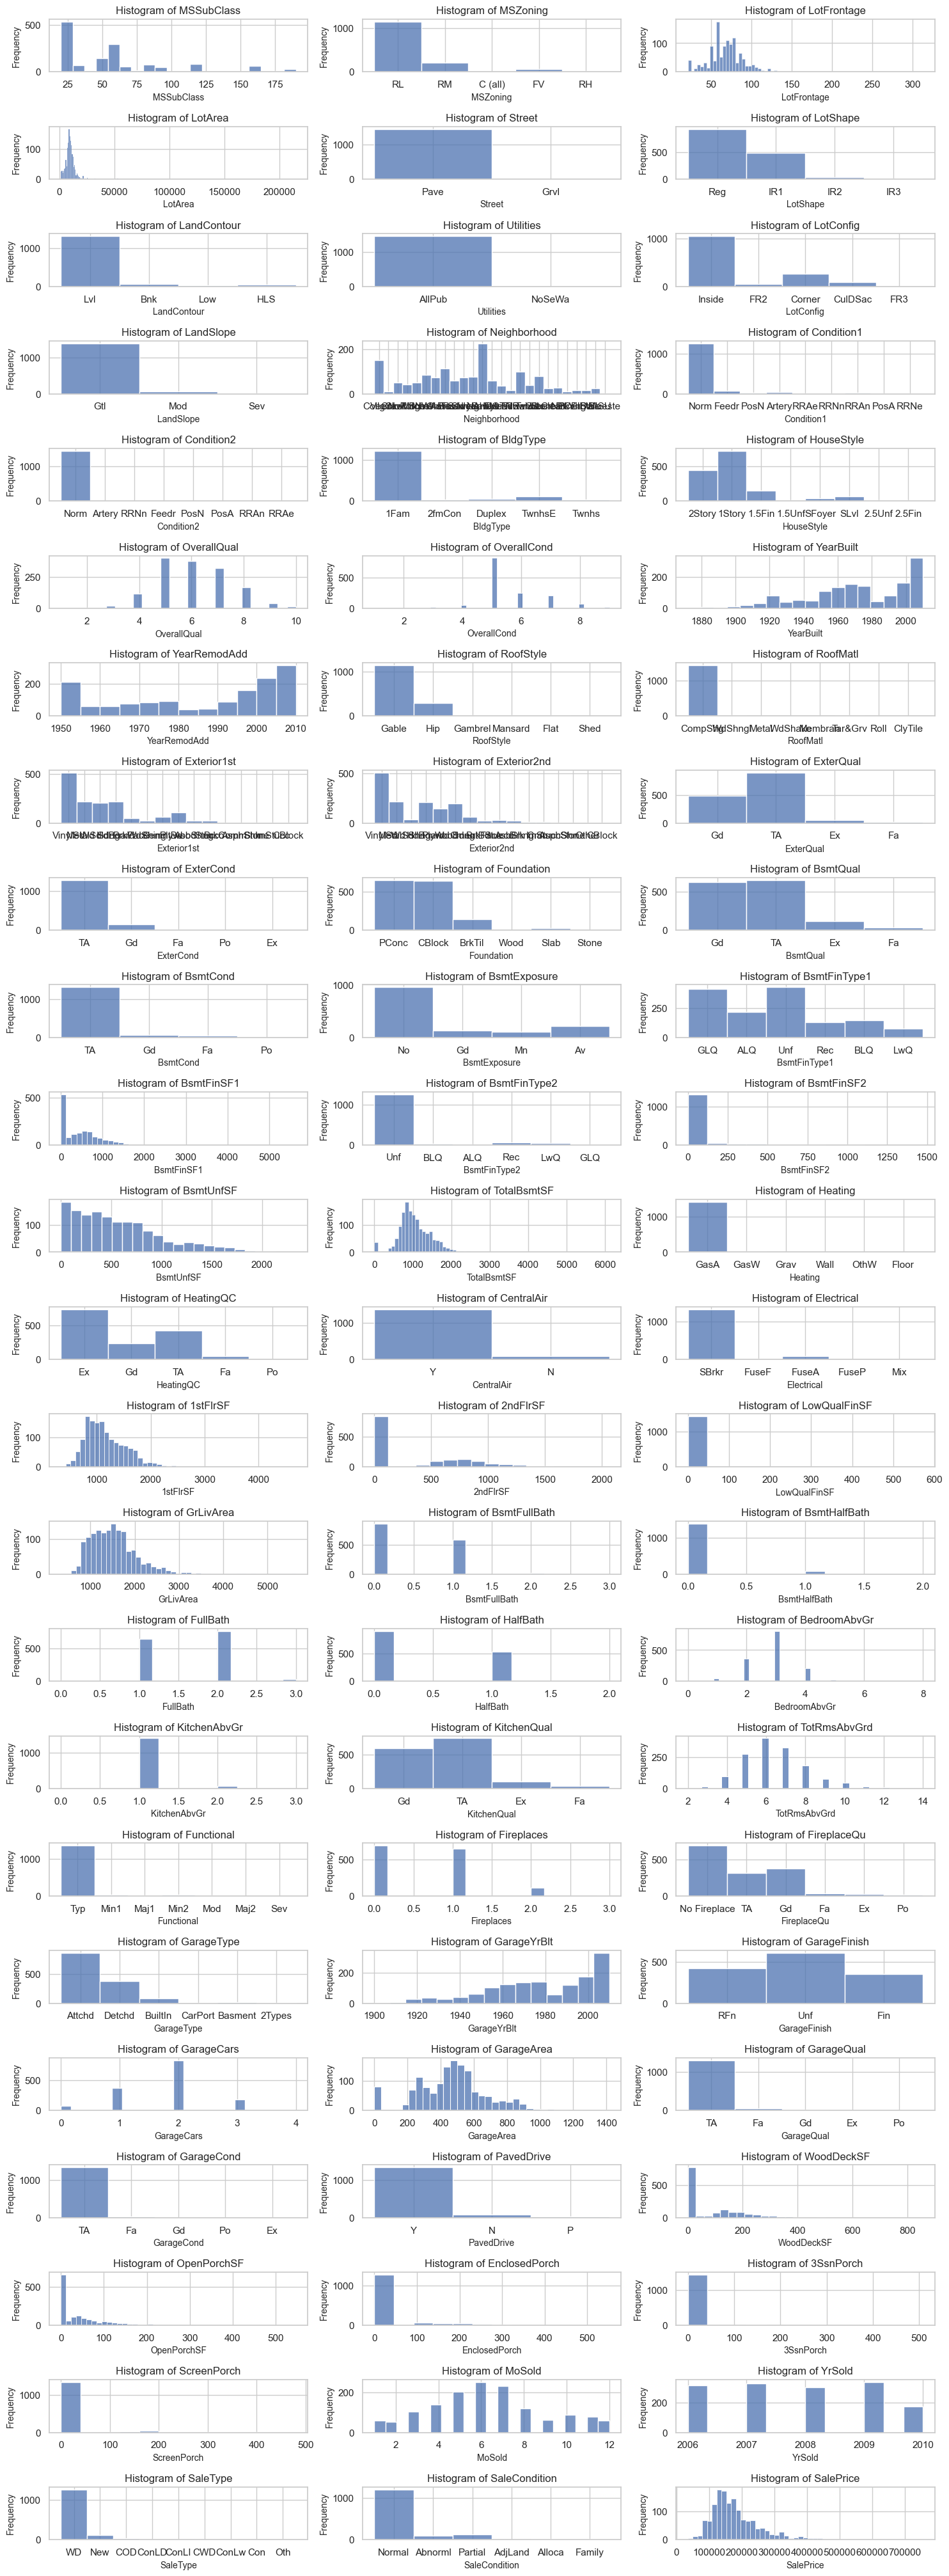

In [59]:
df_train_hist = df_hist(df_train)

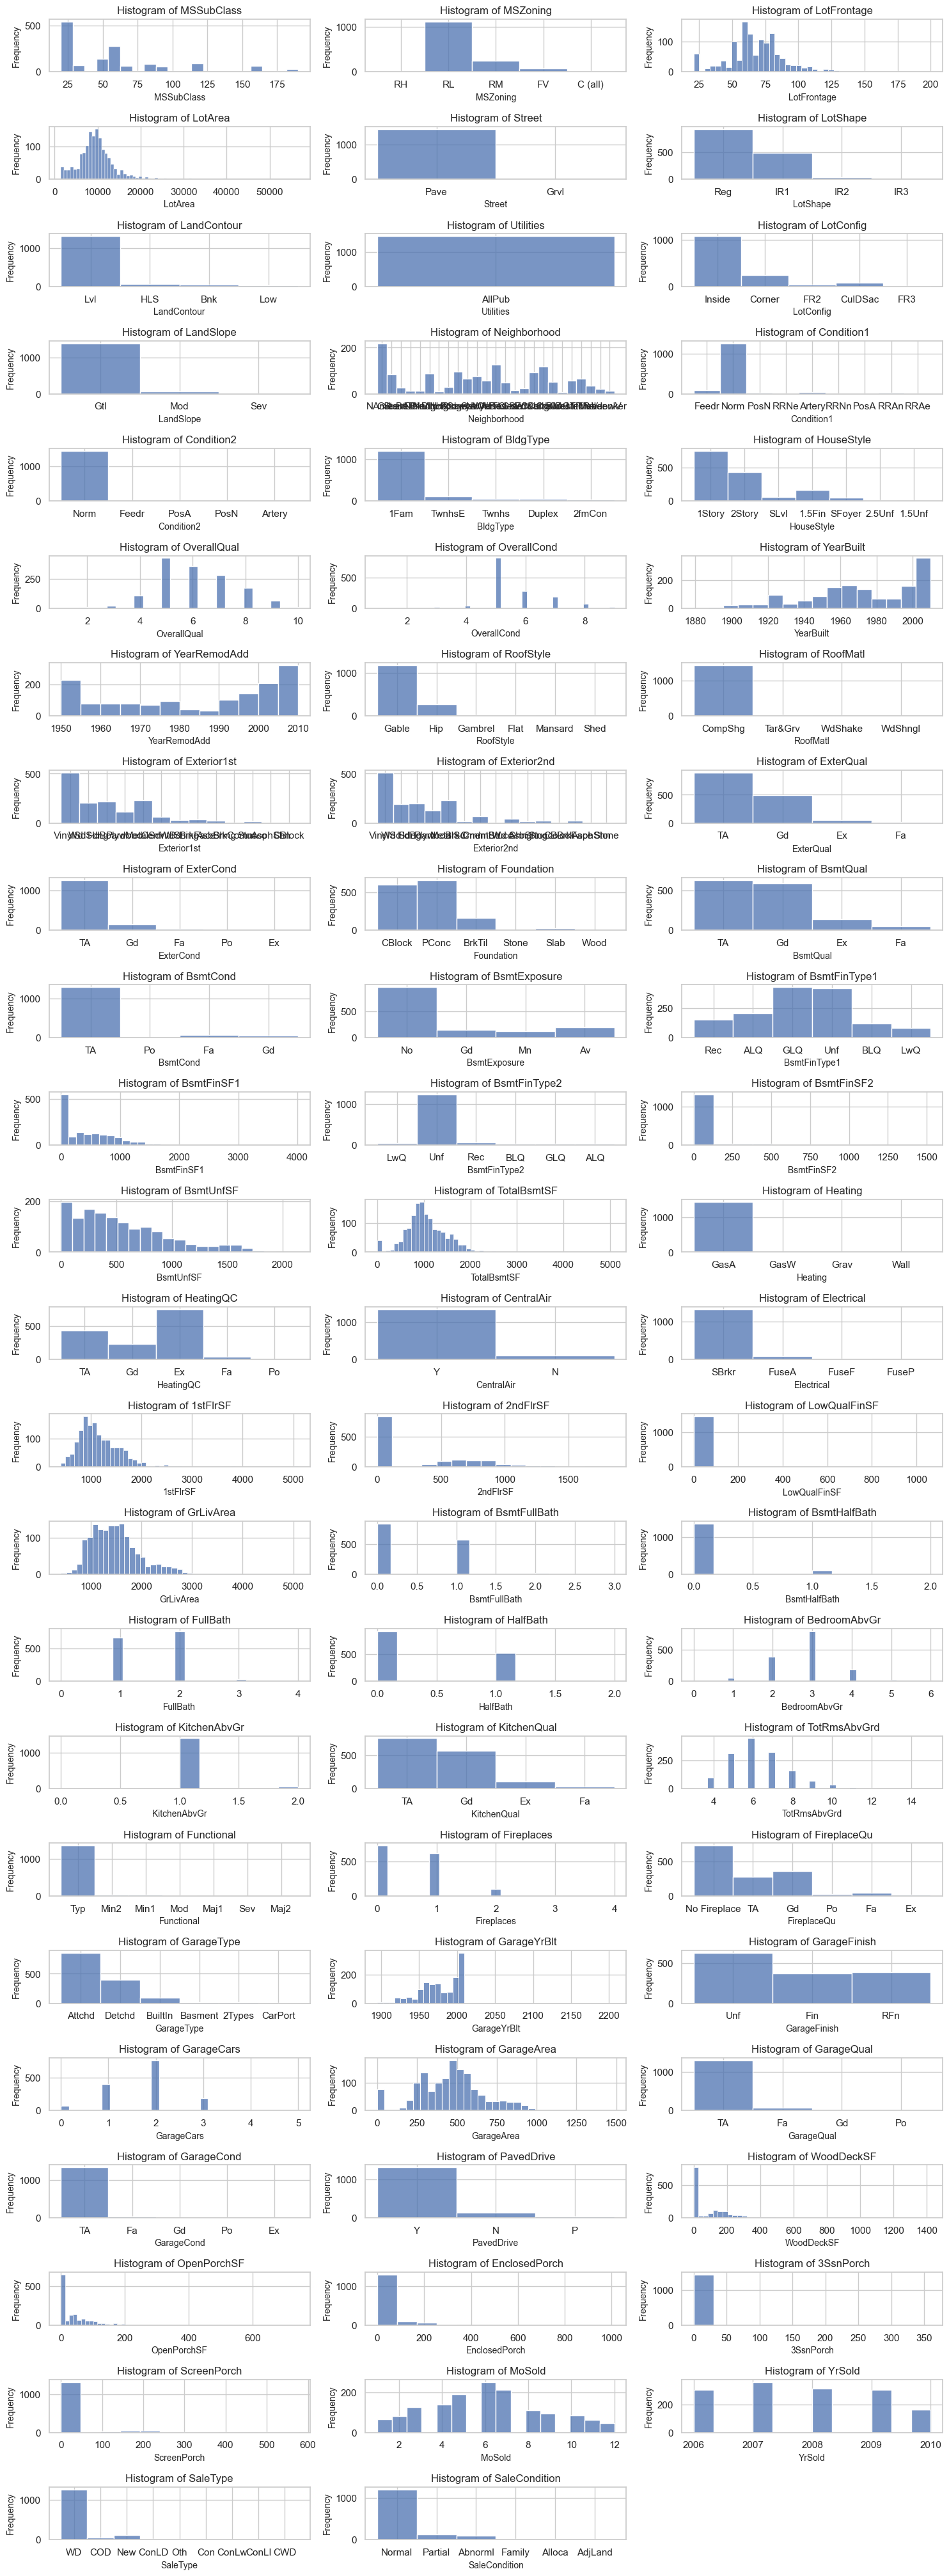

In [60]:
df_test_hist = df_hist(df_test)

+ Many of the histograms exhibit skewness. Some columns have a right-skewed distribution, while others have a left-skewed distribution.
+ Several histograms show outliers,data points significantly deviate from the majority of the data.
+ Some histograms have multiple peaks, indicating that the data may be clustered around different values.
+ Some columns appear to follow a normal distribution, while others have more irregular patterns.

#Imputation of Missing Values

In [61]:
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Categorical column
            df[col] = df[col].fillna(df[col].mode().iloc[0])  # Fill with most frequent value
        elif df[col].dtype in ['int64', 'float64']:  # Numerical column
            df[col] = df[col].fillna(df[col].mean())  # Fill with mean

    return df

In [62]:
df_train = fill_missing_values(df_train)

In [63]:
df_test = fill_missing_values(df_test)

In [64]:
selected_features_train = df_train.select_dtypes(exclude='object')
# Calculate correlation matrix
correlation_matrix_train = selected_features_train.corr()

<Axes: >

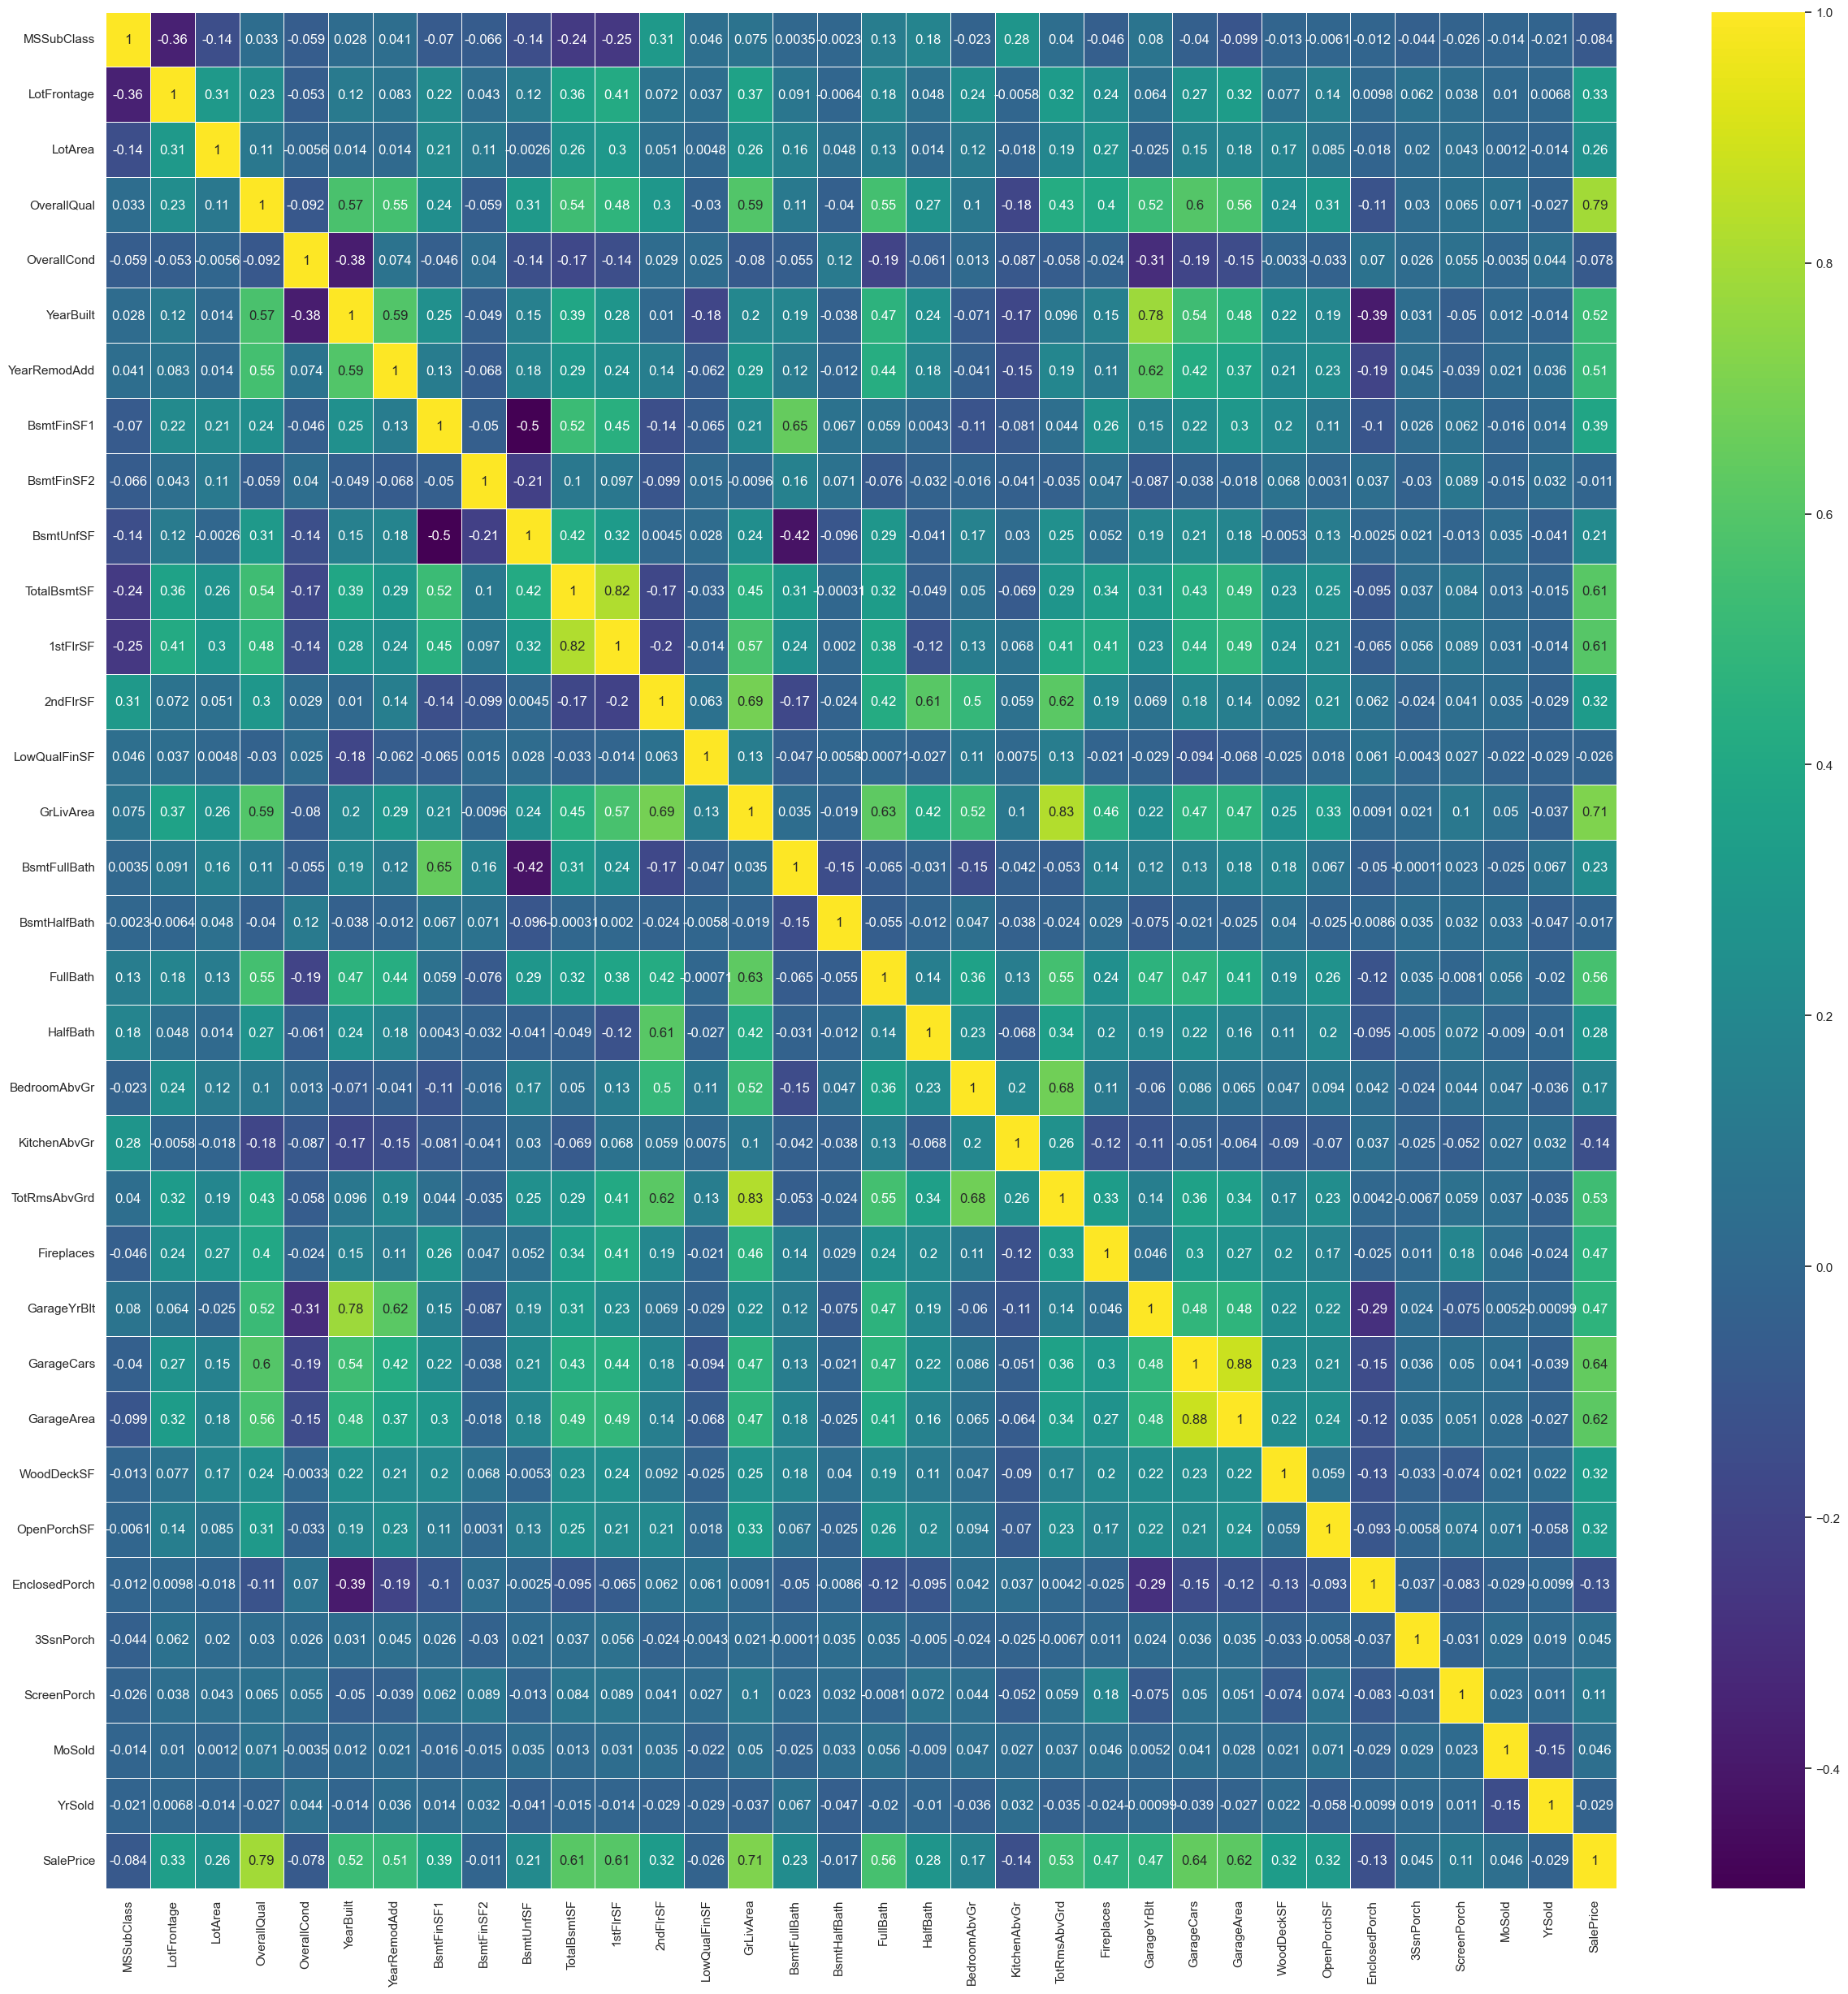

In [65]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix_train,annot=True, cmap="viridis", linewidths=0.5)

In [66]:
indices = np.where(np.triu(np.abs(correlation_matrix_train.values), 1) > 0.7)
indices = [(i, j) for i, j in zip(*indices)]

# Print the pairs of columns with correlations above the threshold
for i, j in indices:
    print(f"{selected_features_train.columns[i]} and {selected_features_train.columns[j]} have a correlation of {correlation_matrix_train.iloc[i, j]:.2f}")

OverallQual and SalePrice have a correlation of 0.79
YearBuilt and GarageYrBlt have a correlation of 0.78
TotalBsmtSF and 1stFlrSF have a correlation of 0.82
GrLivArea and TotRmsAbvGrd have a correlation of 0.83
GrLivArea and SalePrice have a correlation of 0.71
GarageCars and GarageArea have a correlation of 0.88


In [67]:
selected_features_test = df_test.select_dtypes(exclude='object')

# Calculate correlation matrix
correlation_matrix_test = selected_features_test.corr()

<Axes: >

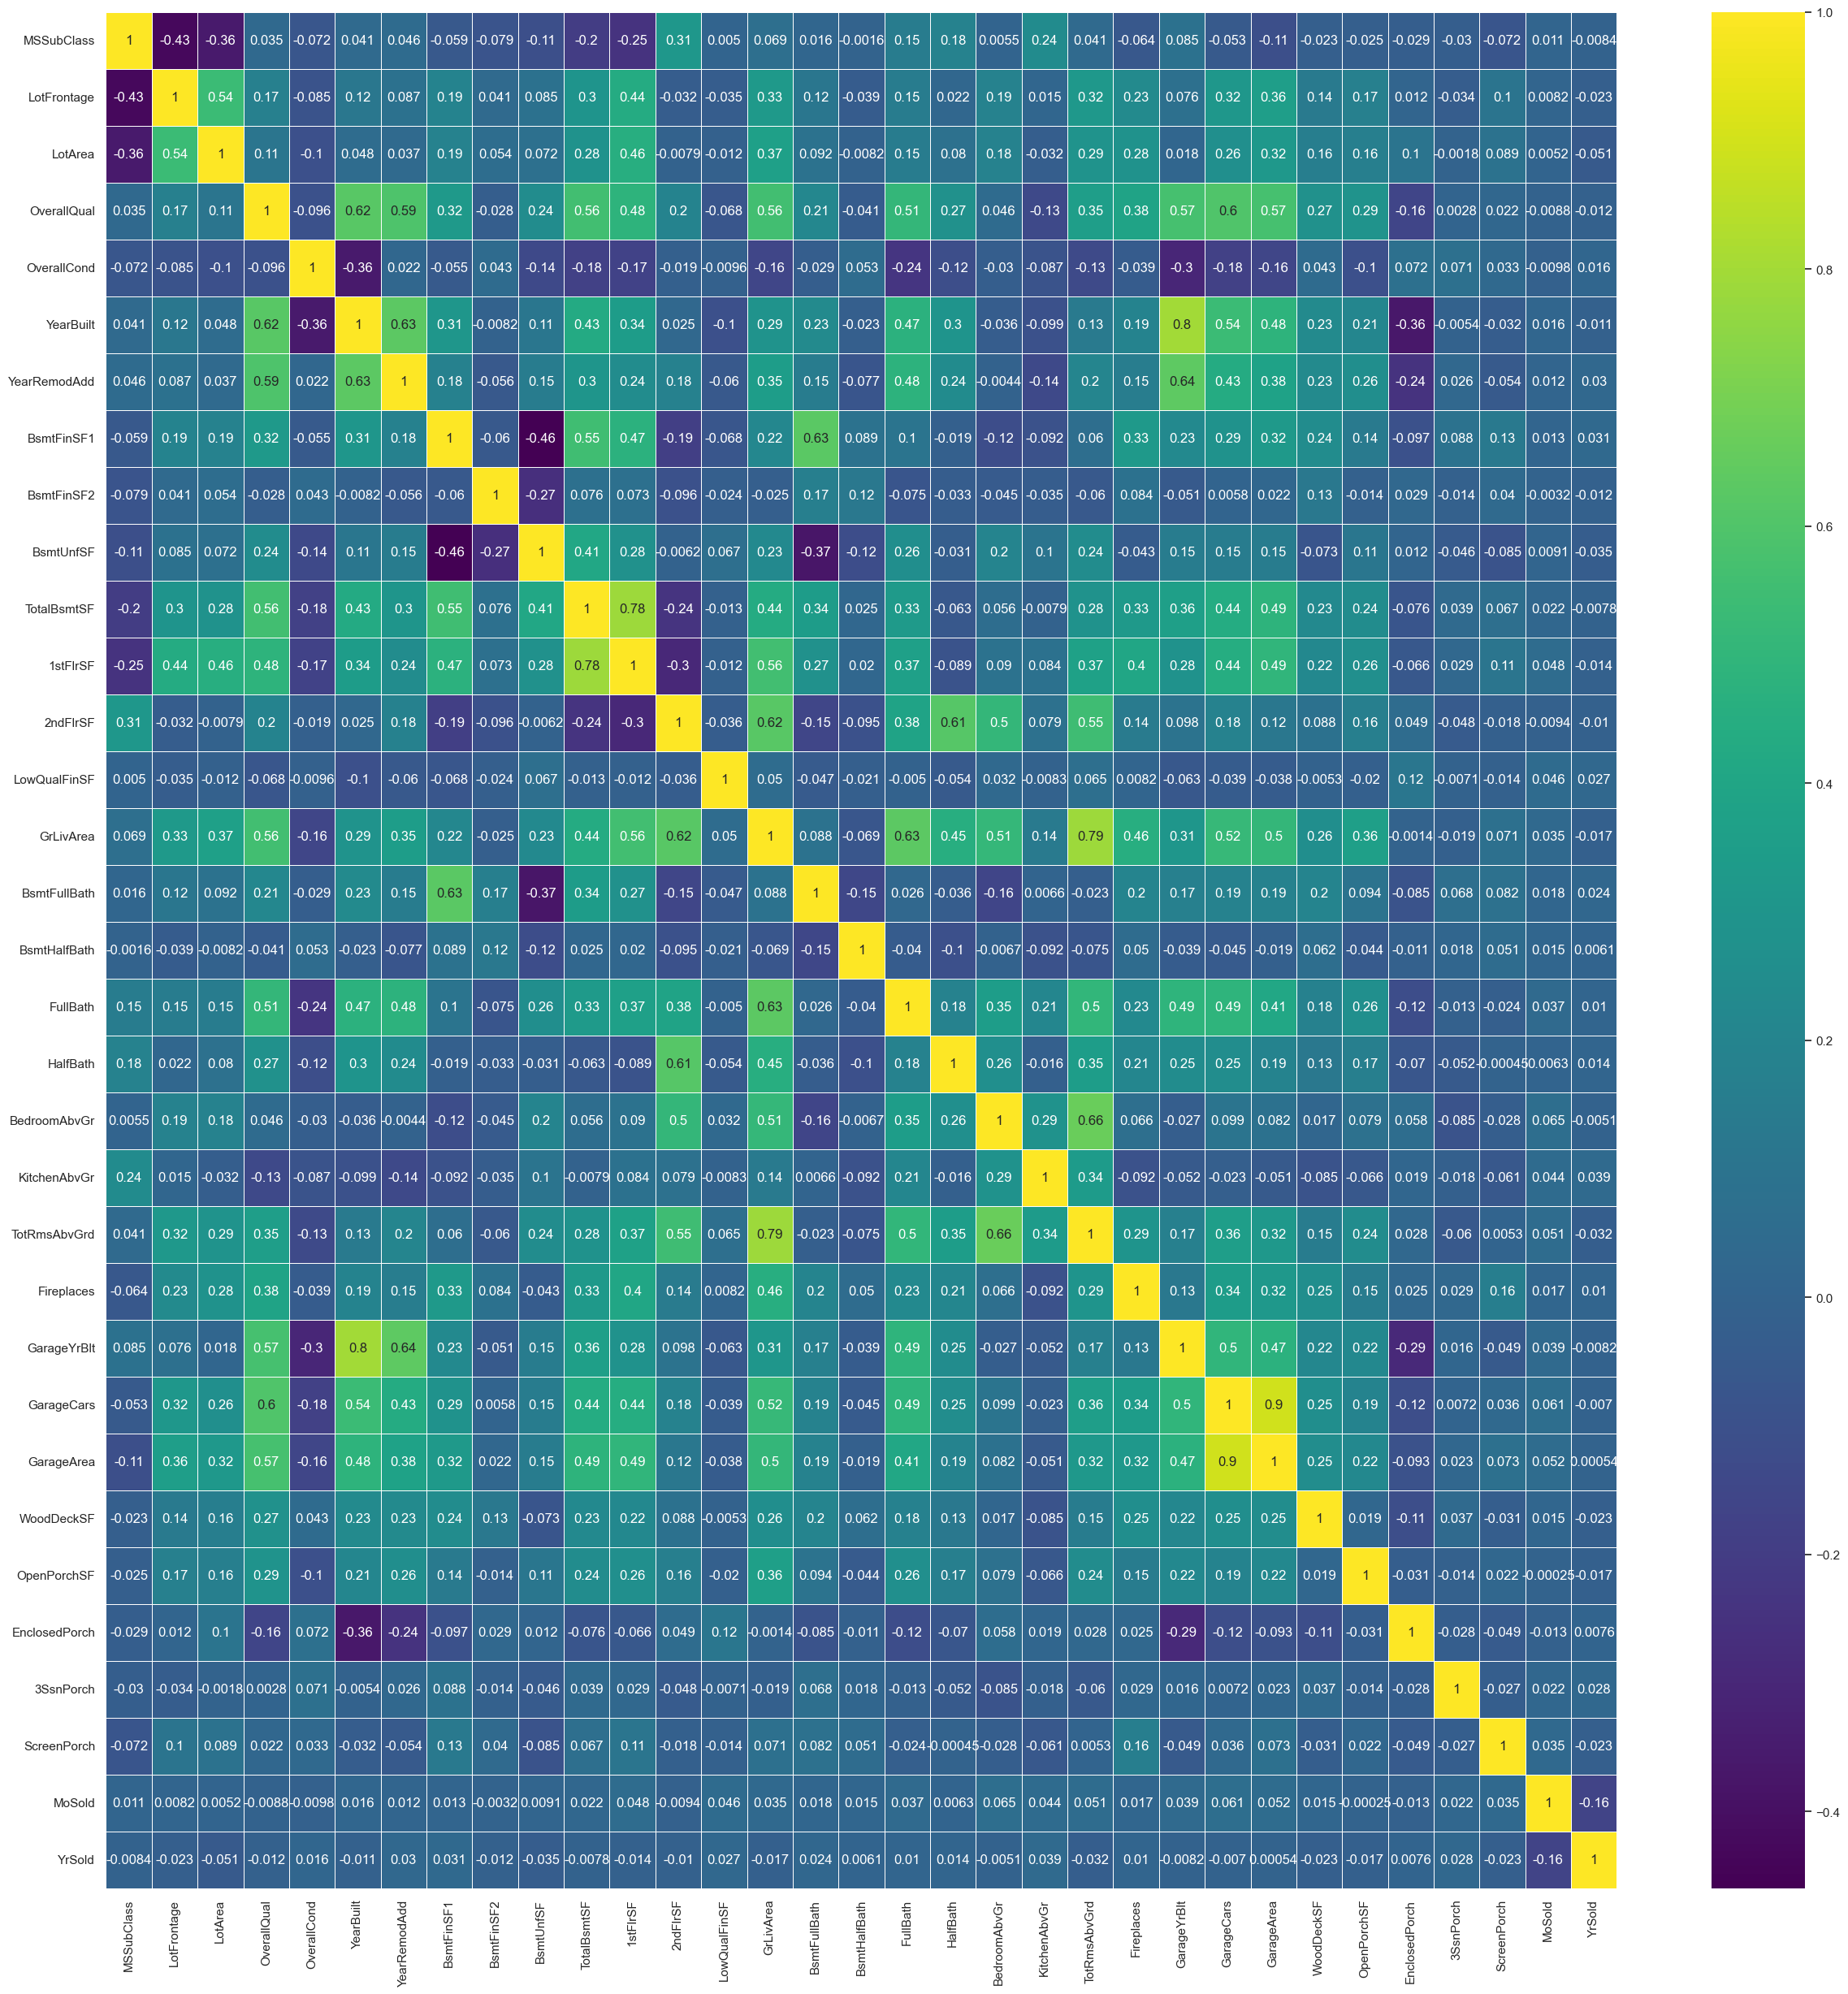

In [68]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix_test, annot=True, cmap="viridis", linewidths=0.5)

In [69]:
indices = np.where(np.triu(np.abs(correlation_matrix_test.values), 1) > 0.7)
indices = [(i, j) for i, j in zip(*indices)]

# Print the pairs of columns with correlations above the threshold
for i, j in indices:
    print(f"{selected_features_test.columns[i]} and {selected_features_test.columns[j]} have a correlation of {correlation_matrix_test.iloc[i, j]:.2f}")

YearBuilt and GarageYrBlt have a correlation of 0.80
TotalBsmtSF and 1stFlrSF have a correlation of 0.78
GrLivArea and TotRmsAbvGrd have a correlation of 0.79
GarageCars and GarageArea have a correlation of 0.90


In [70]:
df_train[["OverallQual","SalePrice"]]

OverallQual  SalePrice
0               7     208500
1               6     181500
2               7     223500
3               7     140000
4               8     250000
...           ...        ...
1455            6     175000
1456            6     210000
1457            7     266500
1458            5     142125
1459            5     147500

[1460 rows x 2 columns]

In [71]:
df_test[["OverallQual","YearBuilt"]]

OverallQual  YearBuilt
0               5       1961
1               6       1958
2               5       1997
3               6       1998
4               8       1992
...           ...        ...
1454            4       1970
1455            4       1970
1456            5       1960
1457            5       1992
1458            7       1993

[1459 rows x 2 columns]

In [72]:
df_train[["OverallQual","YearBuilt"]]

OverallQual  YearBuilt
0               7       2003
1               6       1976
2               7       2001
3               7       1915
4               8       2000
...           ...        ...
1455            6       1999
1456            6       1978
1457            7       1941
1458            5       1950
1459            5       1965

[1460 rows x 2 columns]

Over all quality and year build are correlated in both dataset but they provide kind off same information, although Price column is more highly correlated we would drop it from both datasets

In [73]:
df_train.drop("OverallQual",axis=1, inplace=True)

In [74]:
df_test.drop("OverallQual",axis=1, inplace=True)

In [75]:
df_train[["YearBuilt","GarageYrBlt"]]

YearBuilt  GarageYrBlt
0          2003       2003.0
1          1976       1976.0
2          2001       2001.0
3          1915       1998.0
4          2000       2000.0
...         ...          ...
1455       1999       1999.0
1456       1978       1978.0
1457       1941       1941.0
1458       1950       1950.0
1459       1965       1965.0

[1460 rows x 2 columns]

In [76]:
df_test[["YearBuilt","GarageYrBlt"]]

YearBuilt  GarageYrBlt
0          1961  1961.000000
1          1958  1958.000000
2          1997  1997.000000
3          1998  1998.000000
4          1992  1992.000000
...         ...          ...
1454       1970  1977.721217
1455       1970  1970.000000
1456       1960  1960.000000
1457       1992  1977.721217
1458       1993  1993.000000

[1459 rows x 2 columns]

Many values are duplicated, we will make a new column and will take mean of both columns in it.

In [77]:
df_train["MeanConsYr"] = (df_train["YearBuilt"] + df_train["GarageYrBlt"]) / 2

In [78]:
df_test["MeanConsYr"] = (df_test["YearBuilt"] + df_test["GarageYrBlt"]) / 2

In [79]:
df_train.drop(["YearBuilt","GarageYrBlt"],axis=1, inplace=True)

In [80]:
df_test.drop(["YearBuilt","GarageYrBlt"],axis=1, inplace=True)

In [81]:
df_train[["TotalBsmtSF","1stFlrSF","2ndFlrSF"]]

TotalBsmtSF  1stFlrSF  2ndFlrSF
0             856       856       854
1            1262      1262         0
2             920       920       866
3             756       961       756
4            1145      1145      1053
...           ...       ...       ...
1455          953       953       694
1456         1542      2073         0
1457         1152      1188      1152
1458         1078      1078         0
1459         1256      1256         0

[1460 rows x 3 columns]

We will take mean of these three sq feet and make it a single unit because many values are duplicated in columns

In [82]:
df_train["MeanSF"] = (df_train["TotalBsmtSF"] + df_train["1stFlrSF"] + df_train["2ndFlrSF"]) / 3

In [83]:
df_test["MeanSF"] = (df_test["TotalBsmtSF"] + df_test["1stFlrSF"] + df_test["2ndFlrSF"]) / 3

In [84]:
df_train.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"],axis=1, inplace=True)

In [85]:
df_test.drop(["TotalBsmtSF","1stFlrSF","2ndFlrSF"],axis=1, inplace=True)

In [86]:
df_train[["GarageCars","GarageArea"]]

GarageCars  GarageArea
0              2         548
1              2         460
2              2         608
3              3         642
4              3         836
...          ...         ...
1455           2         460
1456           2         500
1457           1         252
1458           1         240
1459           1         276

[1460 rows x 2 columns]

In [87]:
df_train[['GarageCars', 'GarageArea']].groupby(['GarageCars', 'GarageArea']).value_counts()

GarageCars  GarageArea
0           0             81
1           160            2
            164            1
            180            9
            186            1
                          ..
4           480            1
            784            1
            864            1
            968            1
            1356           1
Name: count, Length: 494, dtype: int64

For same number of Cars we have different Area of a garage, we will drop GarageCars as its not as usefull and GarageArea is.

In [88]:
df_train.drop("GarageCars",axis=1, inplace=True)

In [89]:
df_test.drop("GarageCars",axis=1, inplace=True)

In [90]:
df_train[["GrLivArea","TotRmsAbvGrd"]]

GrLivArea  TotRmsAbvGrd
0          1710             8
1          1262             6
2          1786             6
3          1717             7
4          2198             9
...         ...           ...
1455       1647             7
1456       2073             7
1457       2340             9
1458       1078             5
1459       1256             6

[1460 rows x 2 columns]

Total rooms above ground and area above ground are kind of same thing, so we will drop area feature as its also correlated to Sales Price in our train dataset

In [91]:
df_train.drop("GrLivArea",axis=1,inplace=True)

In [92]:
df_test.drop("GrLivArea",axis=1,inplace=True)

+ ML models can't take categorical features directly so we will transform them now, those that can have natural order in it will be coded using label encoder and others would be through one hot encoding

In [93]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd # You will need to import pandas to use it

# Create a LabelEncoder object
le = LabelEncoder()

label_encoding_cols_train = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'CentralAir', 'PavedDrive', 'Street', 'HouseStyle', 'BldgType', 'OverallCond', 'ExterCond', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','KitchenQual','Functional','GarageFinish','GarageCond']

label_encoding_cols_test = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'CentralAir', 'PavedDrive', 'Street', 'HouseStyle', 'BldgType', 'OverallCond', 'ExterCond', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','KitchenQual','Functional','GarageFinish','GarageCond']

# Fit the encoder to the combined data of training and test sets
for col in label_encoding_cols_train:
    combined_data = pd.concat([df_train[col], df_test[col]], axis=0)
    combined_data = combined_data.astype(str) # Convert the combined data to string type
    le.fit(combined_data)
    df_train[col] = le.transform(df_train[col].astype(str)) # Ensure consistent type before transforming
    df_test[col] = le.transform(df_test[col].astype(str)) # Ensure consistent type before transforming

In [94]:
# Check if the columns exist before trying to create the 'Total_Bath' column
if {'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'}.issubset(df_train.columns):
    df_train['Total_Bath'] = (df_train['FullBath']
        + (0.5 * df_train['HalfBath'])
        + df_train['BsmtFullBath']
        + (0.5 * df_train['BsmtHalfBath']))

    df_train.drop(["FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"], axis=1, inplace=True)

In [95]:
# Check if the columns exist before trying to create the 'Total_Bath' column
if {'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'}.issubset(df_test.columns):
    df_test['Total_Bath'] = (df_test['FullBath']
        + (0.5 * df_test['HalfBath'])
        + df_test['BsmtFullBath']
        + (0.5 * df_test['BsmtHalfBath']))

    df_test.drop(["FullBath", "HalfBath", "BsmtFullBath", "BsmtHalfBath"], axis=1, inplace=True)

In [96]:
print(df_train.shape)
print(df_test.shape)

(1460, 63)
(1459, 62)


In [97]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns for one-hot encoding
categorical_cols_train = df_train.select_dtypes(include=['object']).columns

# Select the columns for one-hot encoding, excluding those for label encoding
one_hot_encoding_cols_train = list(set(categorical_cols_train) - set(label_encoding_cols_train))

# Create a OneHotEncoder object
ohe = OneHotEncoder(drop='first', sparse_output=False)  # Set sparse_output=False to return a dense array

# Fit and transform the specified columns (converts to dense array)
encoded_features_train = ohe.fit_transform(df_train[one_hot_encoding_cols_train])

# Convert the encoded features into a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_features_train, columns=ohe.get_feature_names_out(one_hot_encoding_cols_train))

# Reset the index of the encoded DataFrame to align with df_train
encoded_df.index = df_train.index

# Concatenate the original DataFrame with the encoded features
df_train = pd.concat([df_train, encoded_df], axis=1)

# Drop the original categorical columns that were one-hot encoded
df_train = df_train.drop(one_hot_encoding_cols_train, axis=1)

# The updated df_train now contains the one-hot encoded features and other columns


In [98]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns for one-hot encoding
categorical_cols_test = df_test.select_dtypes(include=['object']).columns

# Select the columns for one-hot encoding, excluding those for label encoding
one_hot_encoding_cols_test = list(set(categorical_cols_test) - set(label_encoding_cols_test))

# Create a OneHotEncoder object
ohe = OneHotEncoder(drop='first', sparse_output=False)  # Set sparse_output=False to return a dense array

# Fit and transform the specified columns (converts to dense array)
encoded_features_test = ohe.fit_transform(df_test[one_hot_encoding_cols_test])

# Convert the encoded features into a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_features_test, columns=ohe.get_feature_names_out(one_hot_encoding_cols_test))

# Reset the index of the encoded DataFrame to align with df_train
encoded_df.index = df_test.index

# Concatenate the original DataFrame with the encoded features
df_test = pd.concat([df_test, encoded_df], axis=1)

# Drop the original categorical columns that were one-hot encoded
df_test = df_test.drop(one_hot_encoding_cols_test, axis=1)

# The updated df_train now contains the one-hot encoded features and other columns


In [99]:
print(df_train.shape)
print(df_test.shape)

(1460, 175)
(1459, 162)


+ Since dimensions for both are change now and ML model wont work for different dimensions, we will remove those unique features we have in train dataset and are not present in test dataset because these features wont be usefull for checking performance for unseen data when dataset would be different.

In [100]:
unique1 = set(df_train.columns).difference(set(df_test.columns))
list1 = list(unique1)
list1

['RoofMatl_Metal',
 'Condition2_RRNn',
 'RoofMatl_Membran',
 'RoofMatl_Roll',
 'SalePrice',
 'Exterior1st_ImStucc',
 'Condition2_RRAe',
 'Exterior2nd_Other',
 'Condition2_RRAn',
 'Exterior1st_Stone',
 'RoofMatl_CompShg',
 'Electrical_Mix',
 'GarageQual_Fa']

In [101]:
list1.remove('SalePrice')

In [102]:
df_train.drop(list1, axis=1, inplace=True)

In [103]:
print(df_train.shape)
print(df_test.shape)

(1460, 163)
(1459, 162)


+ Now we will use scaler to make sure dataset do share same scale and wont create bias for the model and train or model for its best performing parameters.

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best hyperparameters from GridSearchCV: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Cross-validated RMSE scores for each fold: [23426.13328087 29400.5807211  27095.95805736 19915.09311622
 29139.36976118]
Average Cross-validated RMSE: 25795.42698734659
Test Set RMSE: 73089.5216243272
Test Set MAE: 54255.91362518088
Test Set R²: -18.591928482055664


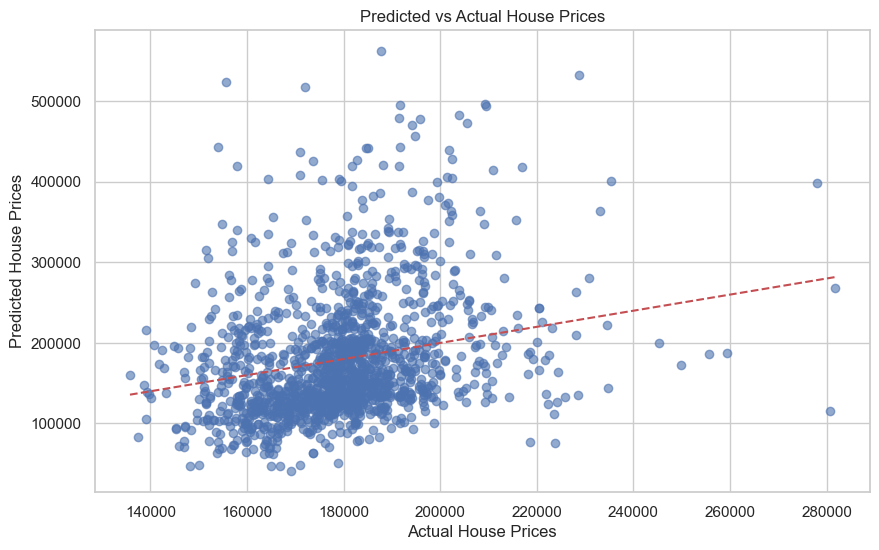

In [104]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

# Assuming df_train and df_test are already loaded
# Separate features (X) and target variable (y)
X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']
X_test = df_test

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the training and test features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Set up the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score from GridSearchCV
best_params = grid_search.best_params_
print(f"Best hyperparameters from GridSearchCV: {best_params}")

# Train the XGBoost model with the best parameters on the full training set
best_xgb_model = grid_search.best_estimator_

# Cross-validation to assess performance using 5 folds
cv_scores = cross_val_score(best_xgb_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE scores for each fold: {cv_rmse_scores}")
print(f"Average Cross-validated RMSE: {np.mean(cv_rmse_scores)}")

# Fit the model to the entire training data
best_xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test_scaled)

# Load the actual test set target values
y_test = pd.read_csv("sample_submission.csv")
y_test = y_test.drop('Id', axis=1)

# Evaluate the model on the test set using RMSE, MAE, and R²
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Test Set RMSE: {rmse_test}")
print(f"Test Set MAE: {mae_test}")
print(f"Test Set R²: {r2_test}")

# Visualize the predicted vs. actual house prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Predicted vs Actual House Prices')
plt.show()
